In [1]:
!pip install --upgrade pingouin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
import pingouin as pg

In [3]:
# COMMON VARIABLES

alg_to_analyze = [
    'sentilexpt_sentiment_analysis_score',
    'sentilexpt_sentiment_analysis_polarity'
]

tpd_columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df_columns = [
    'text',
    'final_score',
    'final_polarity',
    'oplexicon_sentiment_analysis_score',
    'oplexicon_sentiment_analysis_polarity',
    'sentistrength_sentiment_analysis_score',
    'sentistrength_sentiment_analysis_polarity',
    'vader_sentiment_analysis_score',
    'vader_sentiment_analysis_polarity'
]

In [4]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [5]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

26                       27  \
id_str_twitter                23781146                 15148309   
name                      Fe Rebelatto      Sommelier de Airbnb   
screen_name                  rebelatto                Guilh_rm_   
location        Rio de Janeiro, Brasil      somewhere in Brazil   
url                               None  https://t.co/gX4oRZWHg3   

                                     28                                   29  \
id_str_twitter       927028057763995648                             77648005   
name                          ✪ Felippe  Conference Distinguished Specialist   
screen_name              FelippeRegazio                              NannoKa   
location                                                      Ctba-PR Brasil   
url             https://t.co/KkaPlVH4Wu              https://t.co/hDni4Fh2Ng   

                                     30                        31  \
id_str_twitter               3429765093                  10794662   
name                      Paula Santana  Maharaja of the Legacies   
screen_name                  psanrosa13                    rponte   
location                         Brasil             Ceará, Brazil   
url             https://t.co/YJQuDtv2YW   https://t.co/3yZ94QNQvs   

                                     32                             33  \
id_str_twitter      1034514325644431361                      529445600   
name                            Jessica  var nickname = "Riquettinha";   
screen_name                   dev_jessi                    Riquettinha   
location             São Paulo - Brasil         Belo Horizonte, Brasil   
url             https://t.co/MtUeSEBICu        https://t.co/QU71LJgSuD   

                               34                       35  \
id_str_twitter           12050562                 62314491   
name            Roberta Arcoverde                 Gabriela   
screen_name                  rla4          Gabrielathalita   
location        Sao Paulo, Brazil           Belo Horizonte   
url                          None  https://t.co/AmkOKWlftK   

                                     36                       37  
id_str_twitter                 18289937                172880784  
name                    Thamara Andrade              felipe.ts ⚡  
screen_name                      thamyk            felipefialho_  
location        Belo Horizonte, Brazil.    Dark Side of the Moon  
url             https://t.co/JWBzdmQOcV  https://t.co/yPuEuh1bn9

In [6]:
def clean_df(df):
    for c in clean_df_columns:
        del df[c]

In [7]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [8]:
def create_line_plot(df_result, id_user):
    df_result["created_at"] = pd.to_datetime(df_result["created_at"])
    df_result['date_minus_time'] = df_result["created_at"].apply( lambda df_result : datetime.datetime(year=df_result.year, month=df_result.month, day=df_result.day))
    df_result.set_index(df_result["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(df_result[alg_to_analyze[0]].resample('W').mean())

    new_df['week'] = range(1, len(new_df.index) + 1)

    x = new_df["week"]
    y = new_df[alg_to_analyze[0]]

    tickvalues = range(0, int(len(x)), 2)

    if len(tickvalues) > len(x[1::2]):
        tickvalues = range(0, int(len(x)) - (len(tickvalues) - len(x[1::2])), 2)

    fig = plt.figure(figsize=(16,6))

    plt.xticks(ticks = tickvalues ,labels = x[1::2], rotation = 'vertical')

    plt.title("Tweets VADER polarity per week - Participant {}".format(id_user))
    plt.ylabel("Polarity")
    plt.xlabel("Weeks")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

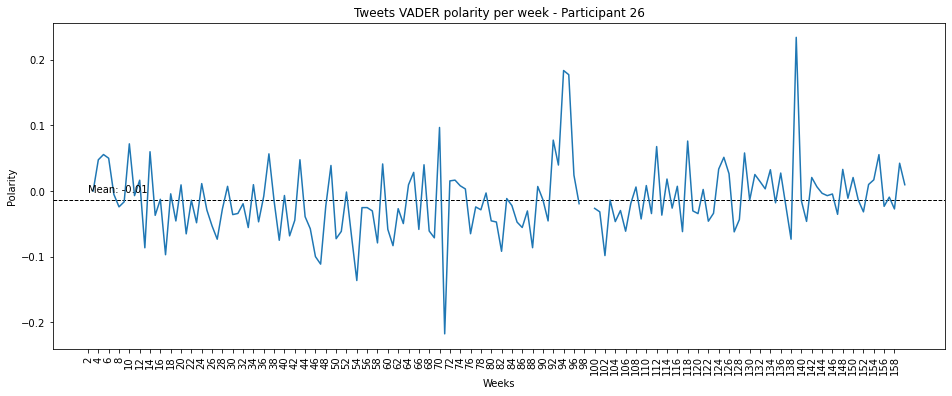

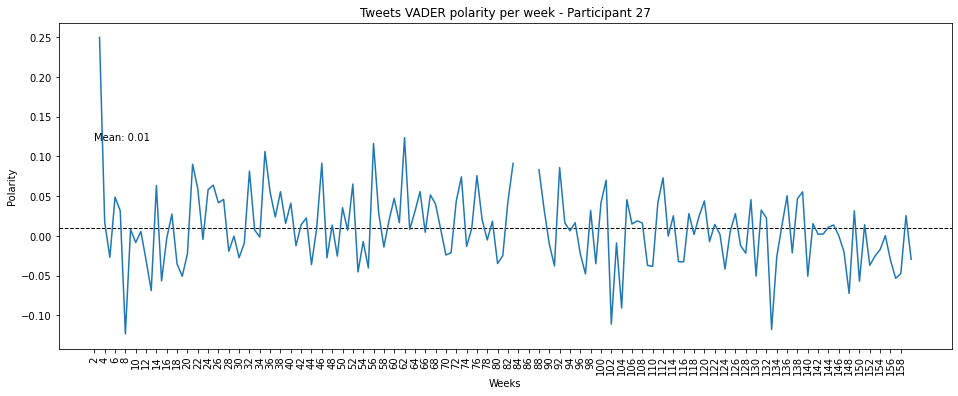

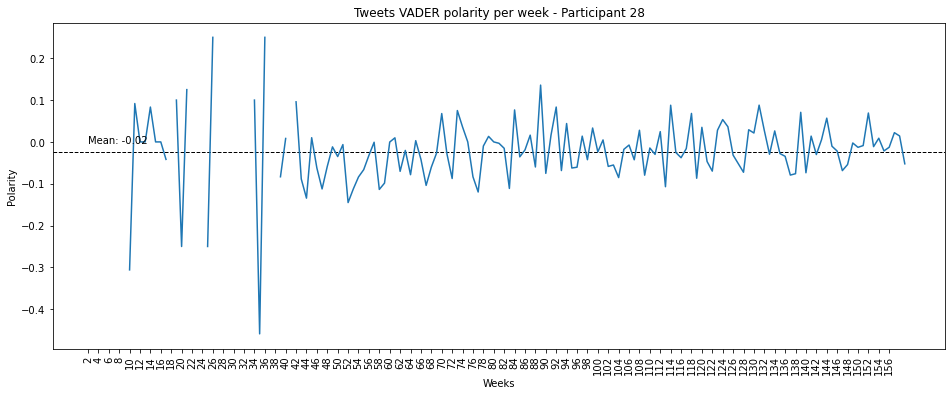

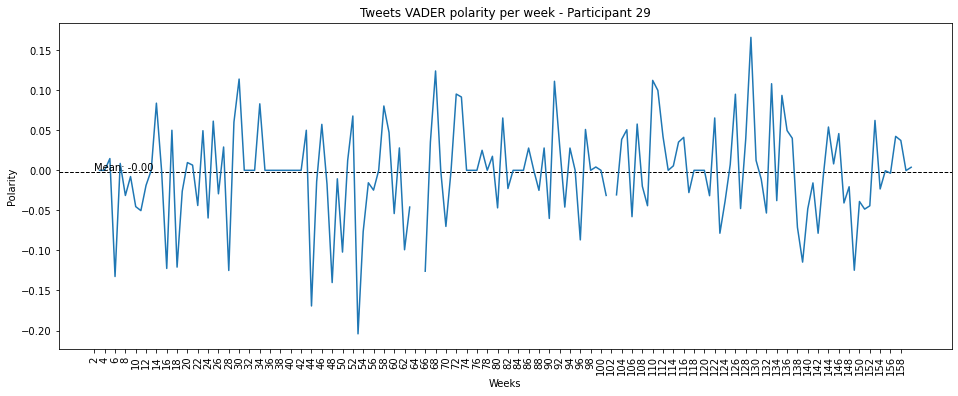

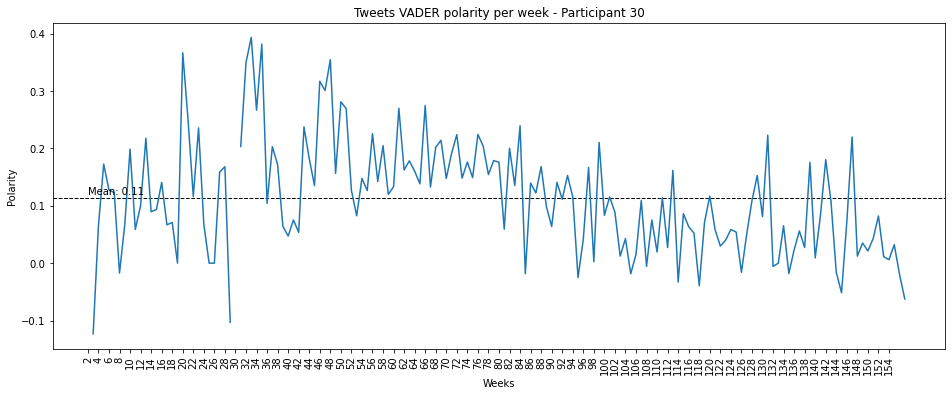

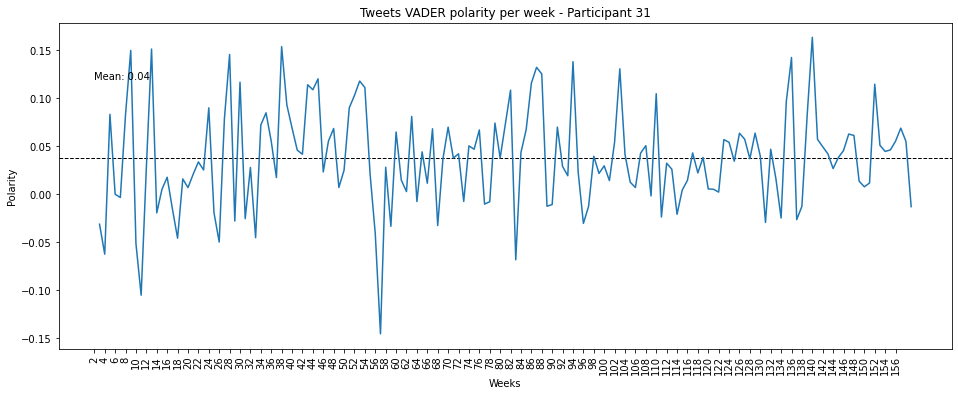

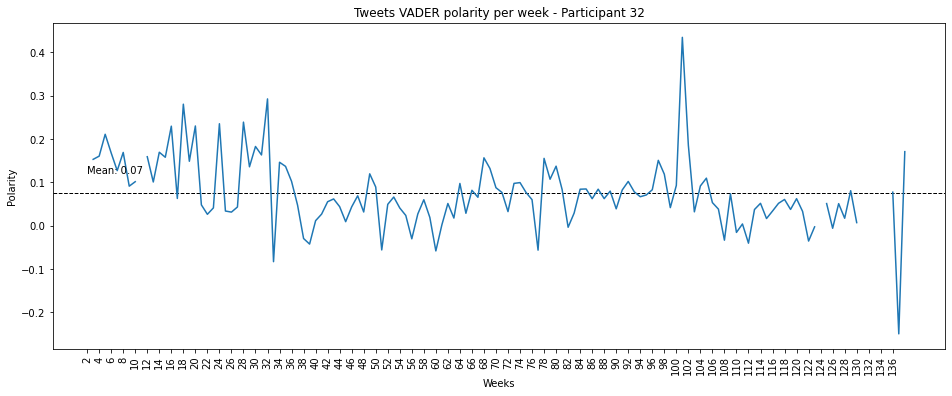

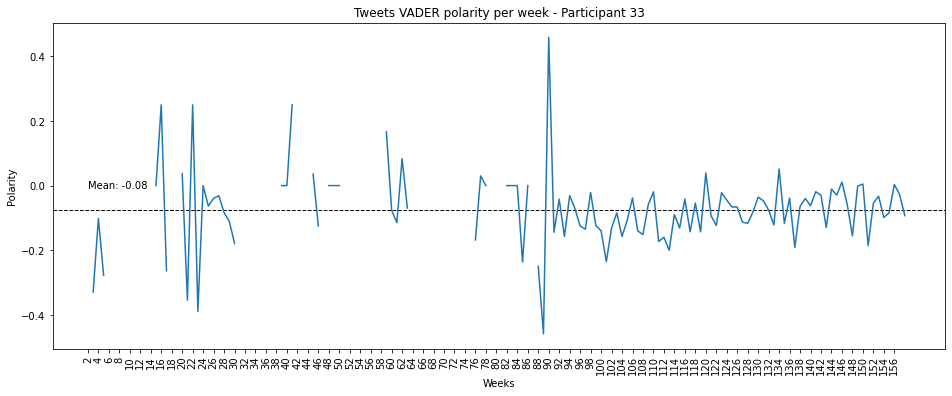

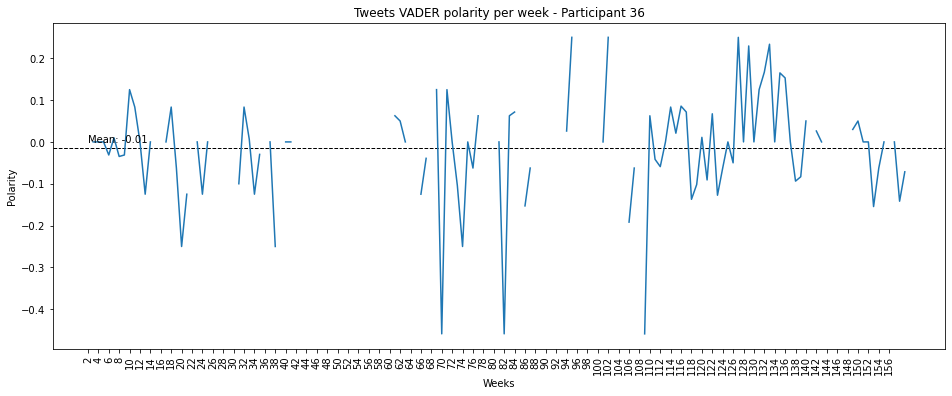

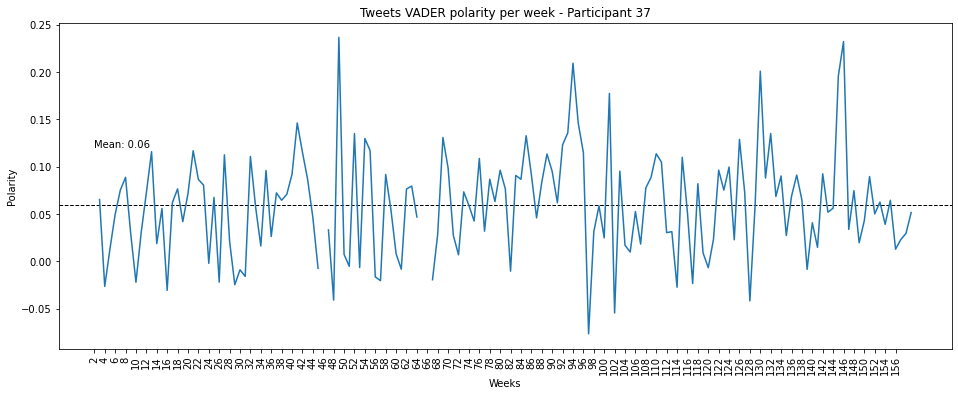

In [9]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    
    create_line_plot(tweets_pd, id_user)

In [10]:
# DATA CONSIDERING THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: VADER')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', alg_to_analyze[0], alg_to_analyze[1]]].copy()
    print('mean: {}'.format(vader_df[alg_to_analyze[0]].mean()))
    qtd_pos = vader_df.query(alg_to_analyze[1] + ' == "pos"')['id_user'].count()
    qtd_neu = vader_df.query(alg_to_analyze[1] + ' == "neu"')['id_user'].count()
    qtd_neg = vader_df.query(alg_to_analyze[1] + ' == "neg"')['id_user'].count()
    qtd_total = vader_df[alg_to_analyze[1]].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean'].append(vader_df[alg_to_analyze[0]].mean())

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: VADER
mean: -0.016055009089104982
pos: 1200
neu: 2476
neg: 1363
% pos: 23.814248858900573
% neu: 49.136733478864855
% neg: 27.04901766223457

id_user: 27
lexicon: VADER
mean: 0.004248512301604738
pos: 1158
neu: 2406
neg: 985
% pos: 25.456144207518133
% neu: 52.89074521872939
% neg: 21.653110573752475

id_user: 28
lexicon: VADER
mean: -0.01582306871734369
pos: 1538
neu: 2742
neg: 1653
% pos: 25.92280465194674
% neu: 46.21607955503118
% neg: 27.86111579302208

id_user: 29
lexicon: VADER
mean: -0.002688394953717535
pos: 907
neu: 1590
neg: 852
% pos: 27.082711257091667
% neu: 47.47685876381009
% neg: 25.44042997909824

id_user: 30
lexicon: VADER
mean: 0.11187166677490562
pos: 1547
neu: 1084
neg: 541
% pos: 48.77049180327869
% neu: 34.17402269861286
% neg: 17.05548549810845

id_user: 31
lexicon: VADER
mean: 0.03964145385590424
pos: 2501
neu: 1948
neg: 1547
% pos: 41.71114076050701
% neu: 32.48832555036691
% neg: 25.80053368912608

id_user: 32
lexicon: VADER
mean: 0.0541

id_user   pos   neu   neg    por_pos    por_neu    por_neg      mean
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823
3        29   907  1590   852  27.082711  47.476859  25.440430 -0.002688
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641
6        32  3609  3644  1921  39.339438  39.720951  20.939612  0.054171
7        33   526   875   930  22.565423  37.537538  39.897040 -0.077845
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614
10       36    99   256   113  21.153846  54.700855  24.145299 -0.013526
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329

In [11]:
# DATA WITHOUT THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean_all' : [],
            'mean_posneg' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: VADER')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', alg_to_analyze[0], alg_to_analyze[1]]].copy()
    final_score = vader_df.query(alg_to_analyze[1] + ' == "pos"')[alg_to_analyze[0]].tolist()
    final_score.extend(vader_df.query(alg_to_analyze[1] + ' == "neg"')[alg_to_analyze[0]].tolist())
    print(len(final_score))
    print(statistics.mean(final_score))
    print('mean: {}'.format(vader_df[alg_to_analyze[0]].mean()))
    qtd_pos = vader_df.query(alg_to_analyze[1] + ' == "pos"')['id_user'].count()
    qtd_neu = vader_df.query(alg_to_analyze[1] + ' == "neu"')['id_user'].count()
    qtd_neg = vader_df.query(alg_to_analyze[1] + ' == "neg"')['id_user'].count()
    qtd_total = vader_df[alg_to_analyze[1]].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean_all'].append(vader_df[alg_to_analyze[0]].mean())
    df_dict['mean_posneg'].append(statistics.mean(final_score))

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: VADER
2563
-0.03156503737807257
mean: -0.016055009089104982
pos: 1200
neu: 2476
neg: 1363
% pos: 23.814248858900573
% neu: 49.136733478864855
% neg: 27.04901766223457

id_user: 27
lexicon: VADER
2143
0.009018423919738686
mean: 0.004248512301604738
pos: 1158
neu: 2406
neg: 985
% pos: 25.456144207518133
% neu: 52.89074521872939
% neg: 21.653110573752475

id_user: 28
lexicon: VADER
3191
-0.02941970125352554
mean: -0.01582306871734369
pos: 1538
neu: 2742
neg: 1653
% pos: 25.92280465194674
% neu: 46.21607955503118
% neg: 27.86111579302208

id_user: 29
lexicon: VADER
1759
-0.0051184961341671385
mean: -0.002688394953717535
pos: 907
neu: 1590
neg: 852
% pos: 27.082711257091667
% neu: 47.47685876381009
% neg: 25.44042997909824

id_user: 30
lexicon: VADER
2088
0.16995063554118775
mean: 0.11187166677490562
pos: 1547
neu: 1084
neg: 541
% pos: 48.77049180327869
% neu: 34.17402269861286
% neg: 17.05548549810845

id_user: 31
lexicon: VADER
4048
0.058717924239130435
mean: 0.039641

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055   
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249   
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823   
3        29   907  1590   852  27.082711  47.476859  25.440430 -0.002688   
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872   
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641   
6        32  3609  3644  1921  39.339438  39.720951  20.939612  0.054171   
7        33   526   875   930  22.565423  37.537538  39.897040 -0.077845   
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674   
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614   
10       36    99   256   113  21.153846  54.700855  24.145299 -0.013526   
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329   

    mean_posneg  
0     -0.031565  
1      0.009018  
2     -0.029420  
3     -0.005118  
4      0.169951  
5      0.058718  
6      0.089868  
7     -0.124627  
8      0.090621  
9      0.067384  
10    -0.029859  
11     0.087523

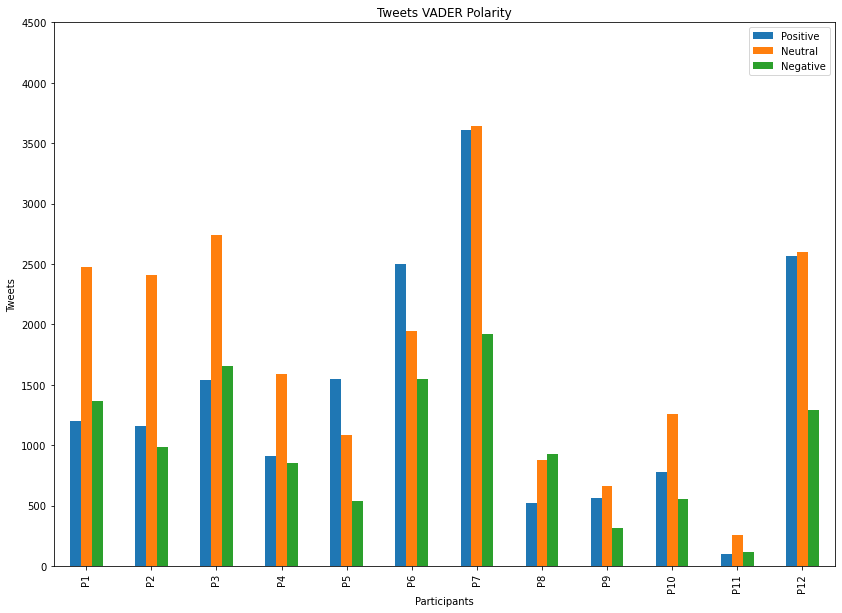

In [12]:
# multiple bar plots

bar_chart_data = []

y_range = range(0,4501, 500)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['pos'], df_chart.iloc[i]['neu'], df_chart.iloc[i]['neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,10))

plt.legend(["Positive", "Neutral", "Negative"])
plt.title('Tweets VADER Polarity')
plt.xlabel('Participants')
plt.ylabel('Tweets')

plt.show()

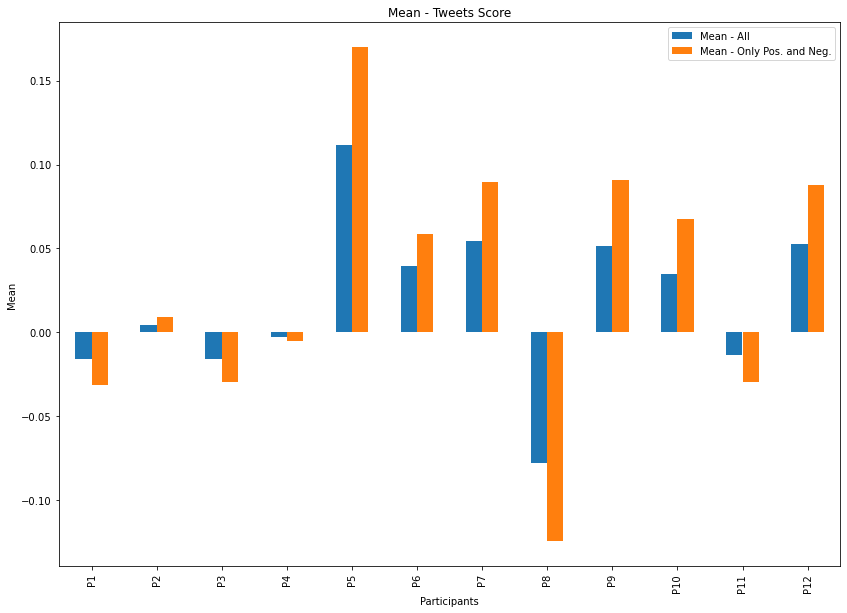

In [13]:
# multiple bar plots with means

bar_chart_data = []

y_range = range(-1,1)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['mean_all'], df_chart.iloc[i]['mean_posneg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,10))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."])
plt.title('Mean - Tweets Score')
plt.xlabel('Participants')
plt.ylabel('Mean')

plt.show()

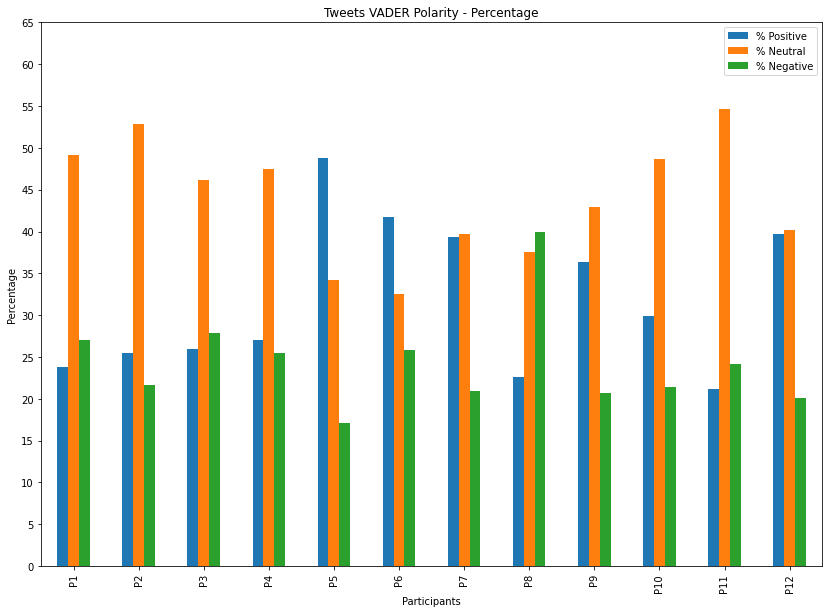

In [14]:
# multiple line plots

bar_chart_data = []

y_range = range(0, 70, 5)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['por_pos'], df_chart.iloc[i]['por_neu'], df_chart.iloc[i]['por_neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,10))


plt.legend(['% Positive', '% Neutral', '% Negative'])
plt.title('Tweets VADER Polarity - Percentage')
plt.xlabel('Participants')
plt.ylabel('Percentage')

plt.show()

In [15]:
bigfive = {}

for c in data:
    id_user = c

    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        id = int(df_bf[6])

        del df_bf[0]
        del df_bf[6]

        df_bf.columns = ['O', 'C', 'E', 'A', 'N']

        bigfive[id] = df_bf

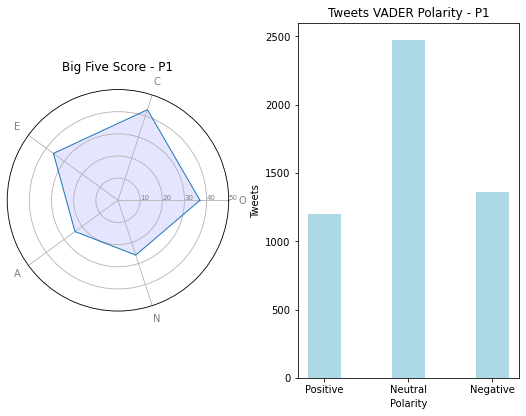

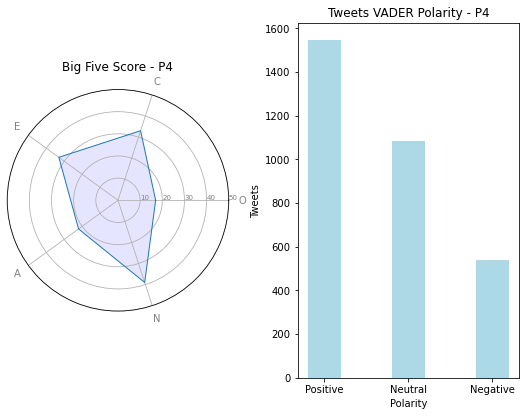

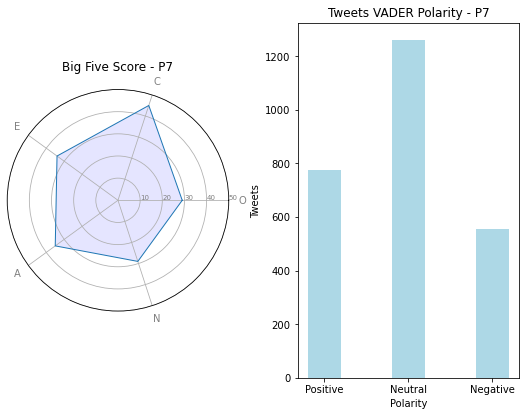

In [16]:
count = 1

for i in bigfive:
    b = bigfive[i]

    o = [b['O']]
    c = [b['C']]
    e = [b['E']]
    a = [b['A']]
    n = [b['N']]

    # Set data
    df = pd.DataFrame({
    'group': ['A'],
    'O': o,
    'C': c,
    'E': e,
    'A': a,
    'N': n
    })

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    
    fig = plt.figure(figsize=(8, 6))
    gs = GridSpec(nrows=1, ncols=2)
    
    # Initialise the spider plot
    ax = fig.add_subplot(gs[0, 0])
    ax = plt.subplot(121, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=7)
    plt.ylim(0,50)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title('Big Five Score - P{}'.format(count))
    
#     plt.tight_layout()

    # Show the graph
#     plt.show()
    
    plt.subplot(122)
    
    y_range = range(0,6001, 500)

    d = {"Positive": int(df_chart.query('id_user == {}'.format(i))['pos']), 
         "Neutral": int(df_chart.query('id_user == {}'.format(i))['neu']), 
         "Negative": int(df_chart.query('id_user == {}'.format(i))['neg'])}
    
#     plt.figure(figsize = (8, 6))

    plt.tight_layout(pad=2.8)
#     plt.subplot_tool()
 
    # creating the bar plot
    plt.bar(d.keys(), d.values(), width = 0.4, color = 'lightblue')

    plt.title('Tweets VADER Polarity - P{}'.format(count))
    plt.xlabel('Polarity')
    plt.ylabel('Tweets')

    plt.show()
    
    count += 1

In [17]:
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055   
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249   
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823   
3        29   907  1590   852  27.082711  47.476859  25.440430 -0.002688   
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872   
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641   
6        32  3609  3644  1921  39.339438  39.720951  20.939612  0.054171   
7        33   526   875   930  22.565423  37.537538  39.897040 -0.077845   
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674   
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614   
10       36    99   256   113  21.153846  54.700855  24.145299 -0.013526   
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329   

    mean_posneg  
0     -0.031565  
1      0.009018  
2     -0.029420  
3     -0.005118  
4      0.169951  
5      0.058718  
6      0.089868  
7     -0.124627  
8      0.090621  
9      0.067384  
10    -0.029859  
11     0.087523

[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

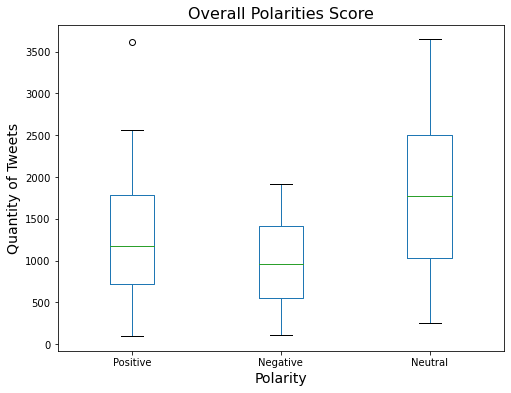

In [18]:
bplot = df_chart.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("Quantity of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

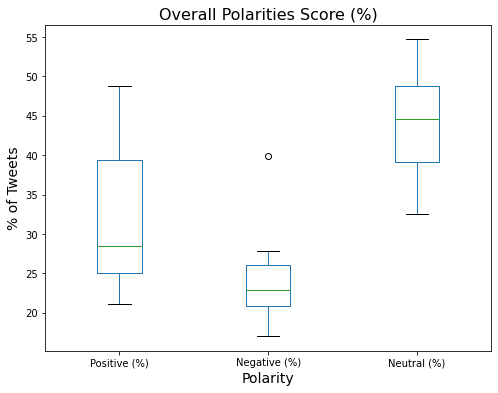

In [19]:
bplot = df_chart.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("% of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

[Text(1, 0, 'All Polarities'), Text(2, 0, 'Only Positives and Negatives')]

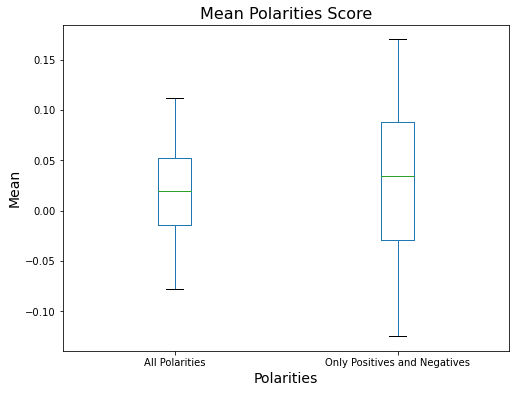

In [20]:
bplot = df_chart.boxplot(column=['mean_all', 'mean_posneg'], grid=False, figsize=(8,6))

bplot.axes.set_title("Mean Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarities", fontsize=14) 
bplot.set_ylabel("Mean", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['All Polarities', 'Only Positives and Negatives'])

In [21]:
def plot_point_chart(df, count, id_user):

    first_date = df.iloc[0]['date_minus_time']
    
    for i in range(1,13):
        end_date = first_date + relativedelta(months=+3)
        mask = (df['created_at'] >= first_date) & (df['created_at'] < end_date)
        new_df = df.loc[mask]
        
        fig, ax = plt.subplots(figsize=(24, 8))
    
        x = new_df['date_minus_time']
        y = new_df[alg_to_analyze[0]]

        x_ticks = x

        colors = {'pos':'green', 'neu':'orange', 'neg':'red'}

        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xticks(x_ticks, rotation='vertical', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity VADER Score', fontsize=16)
        
        plt.title('Scatter Plot - VADER - P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
        plt.legend()

        plt.scatter(x, y, alpha=0.7, c=new_df[alg_to_analyze[1]].map(colors))
        
#         plt.savefig('images/scatter_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        first_date = end_date

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ip

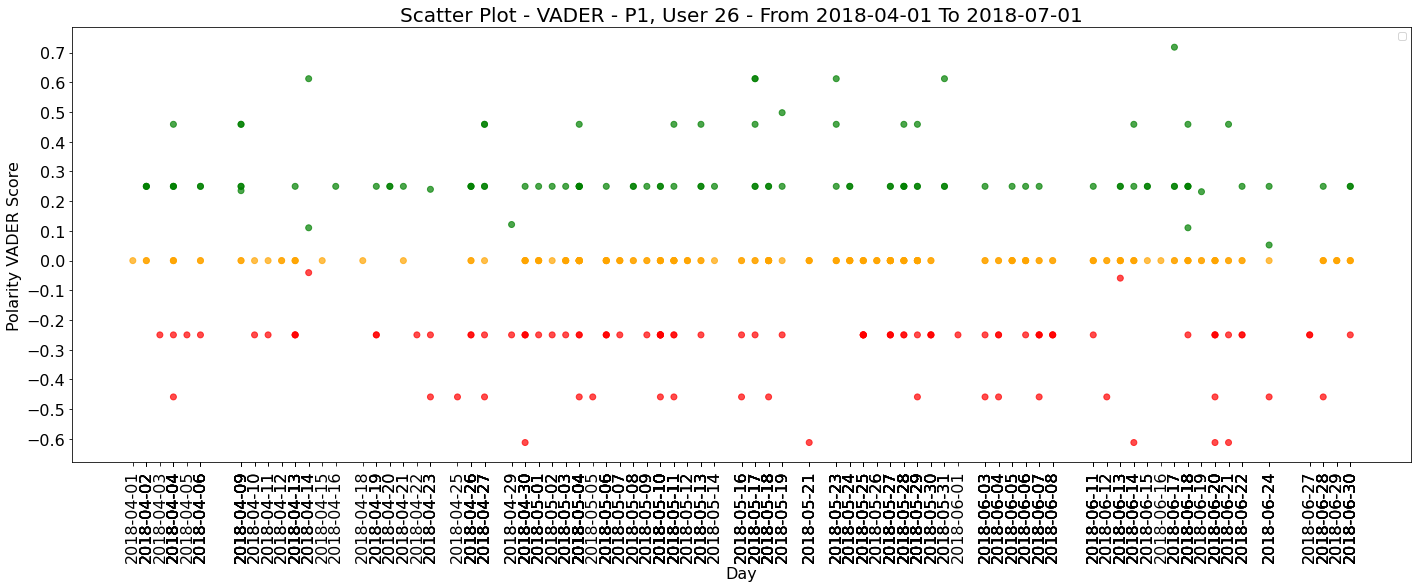

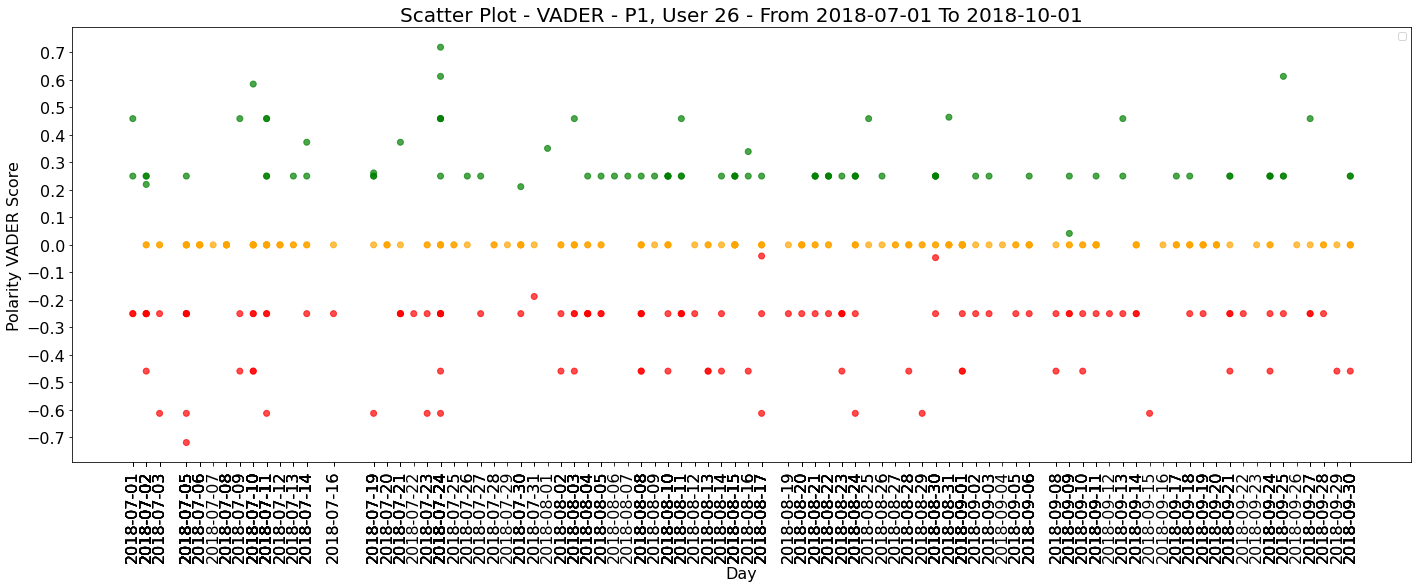

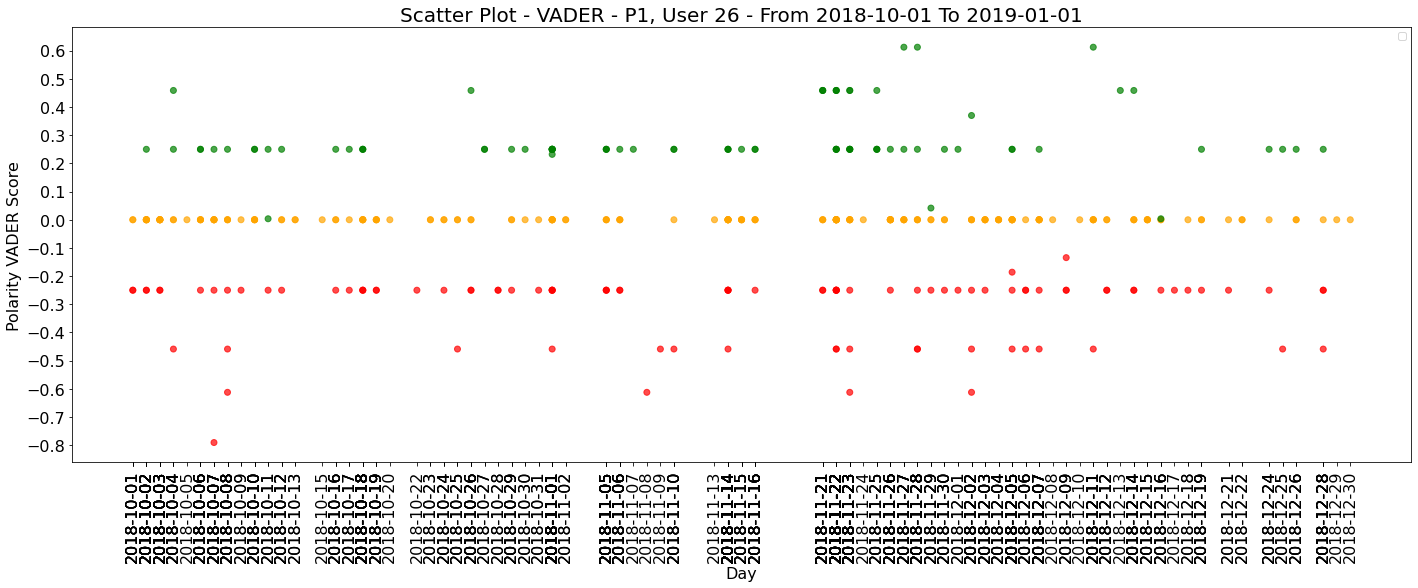

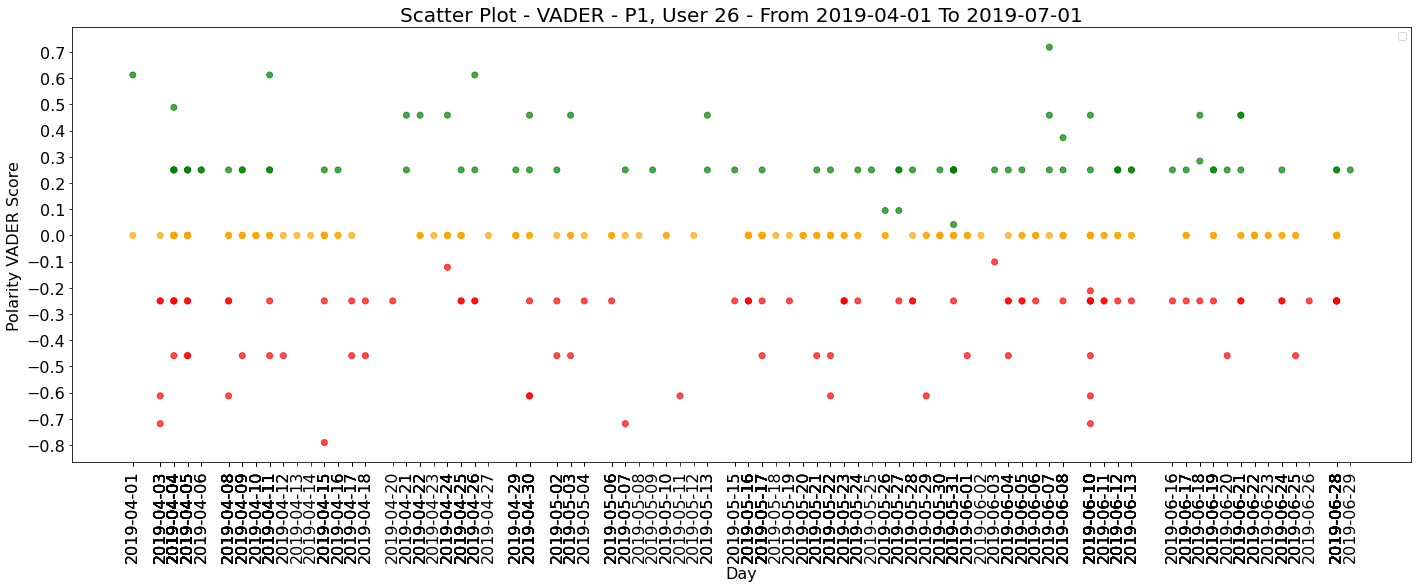

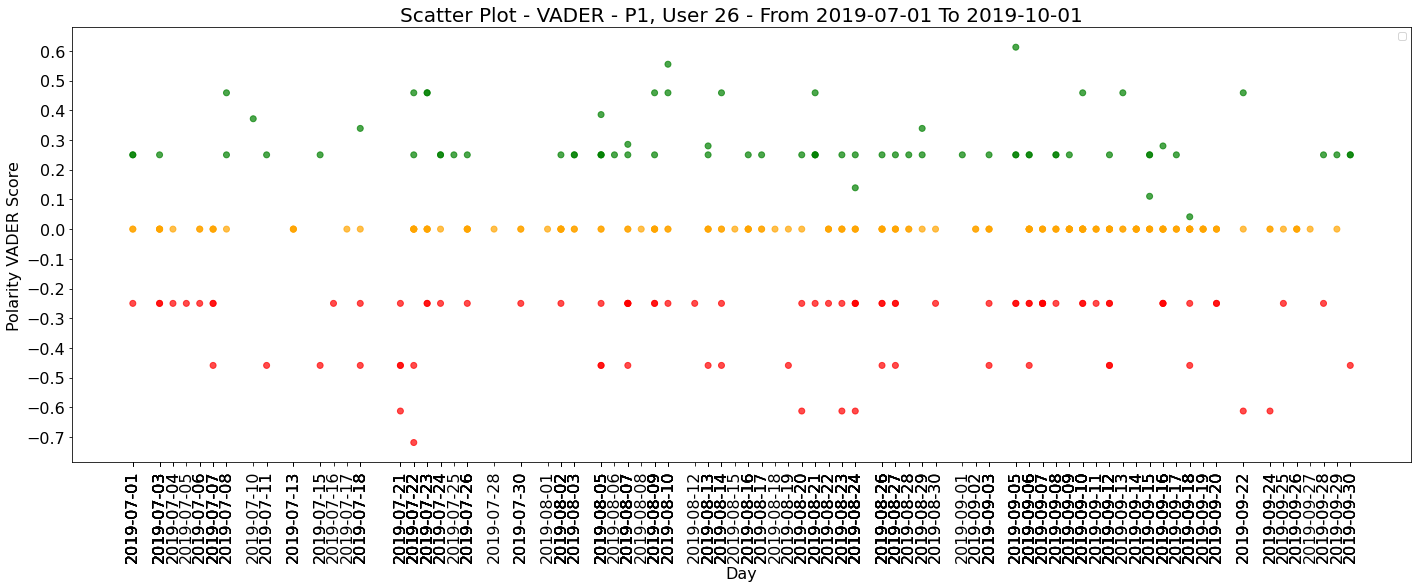

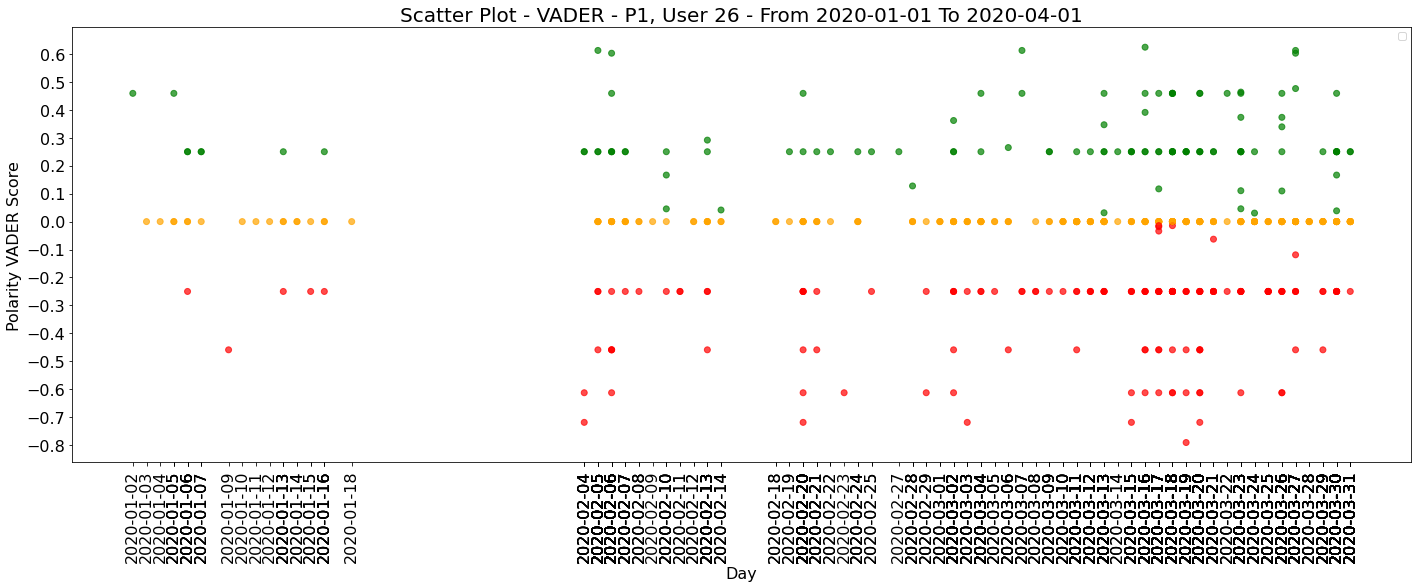

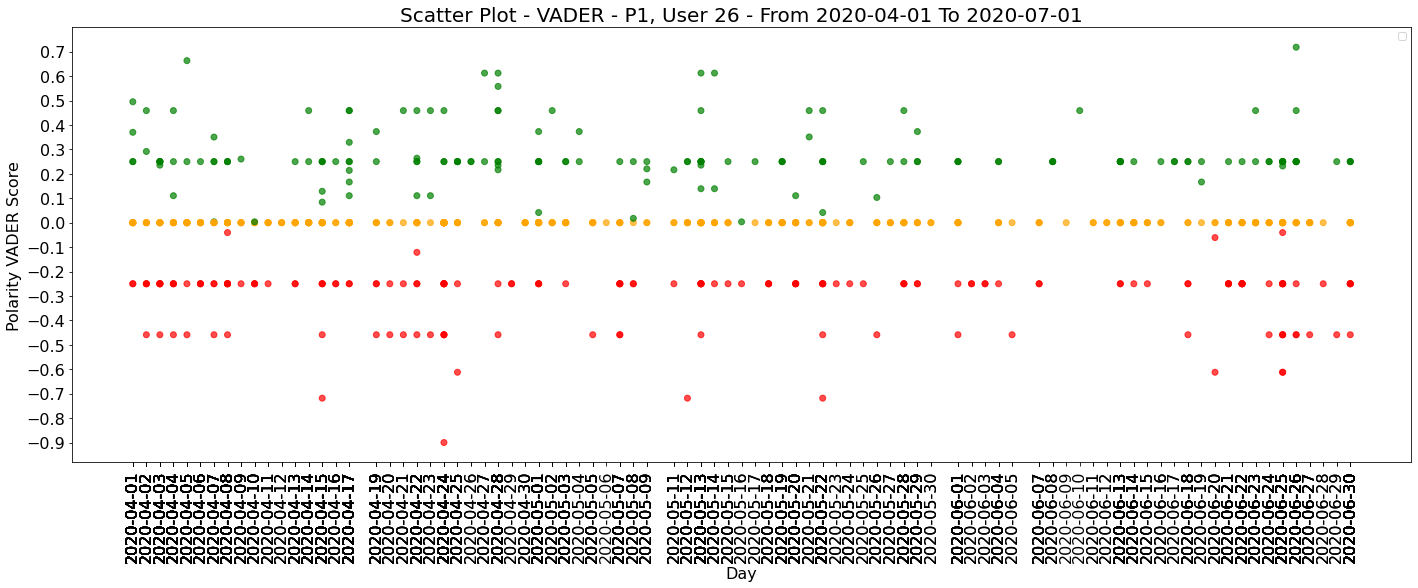

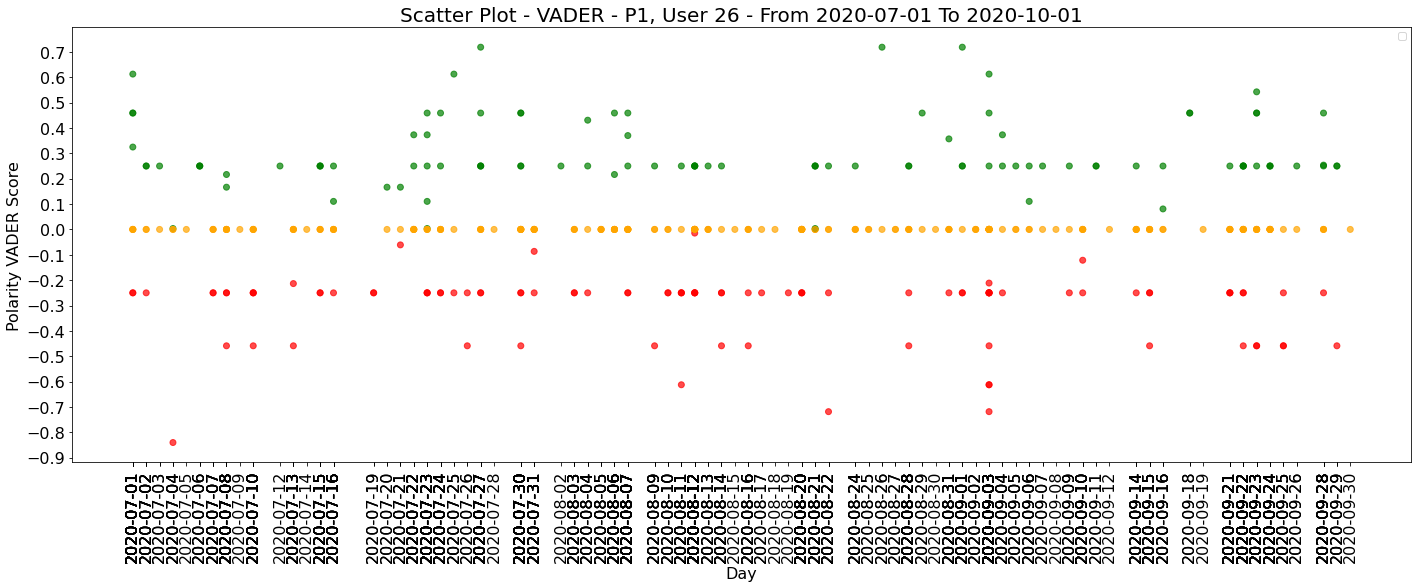

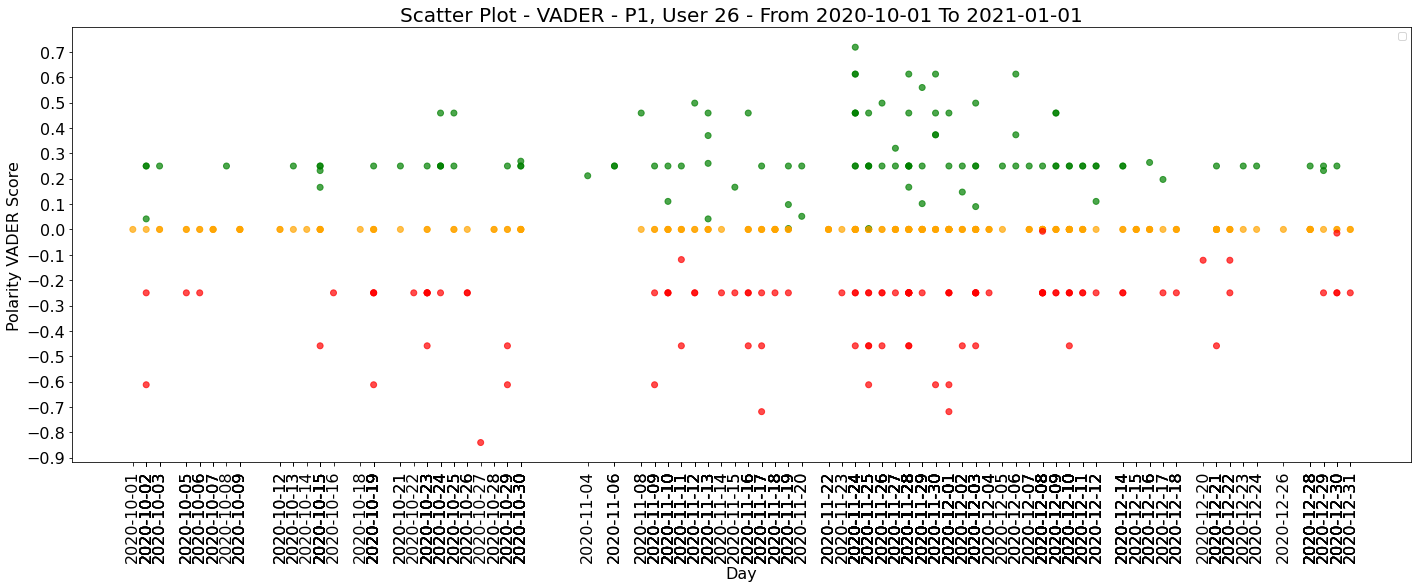

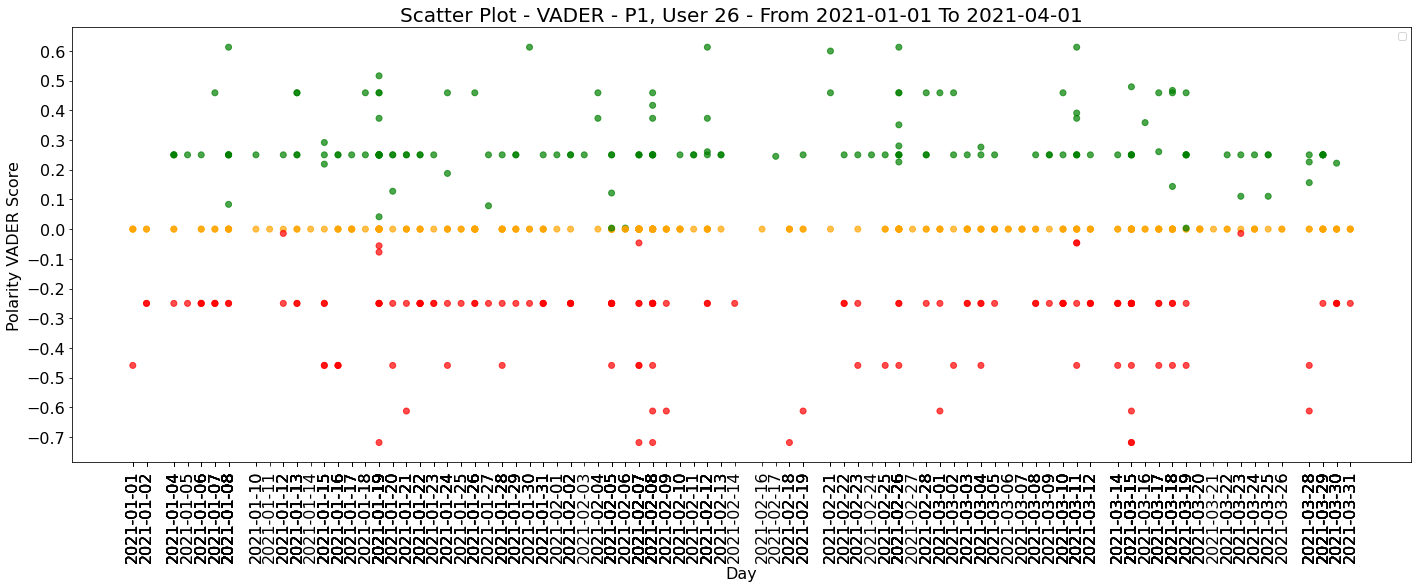

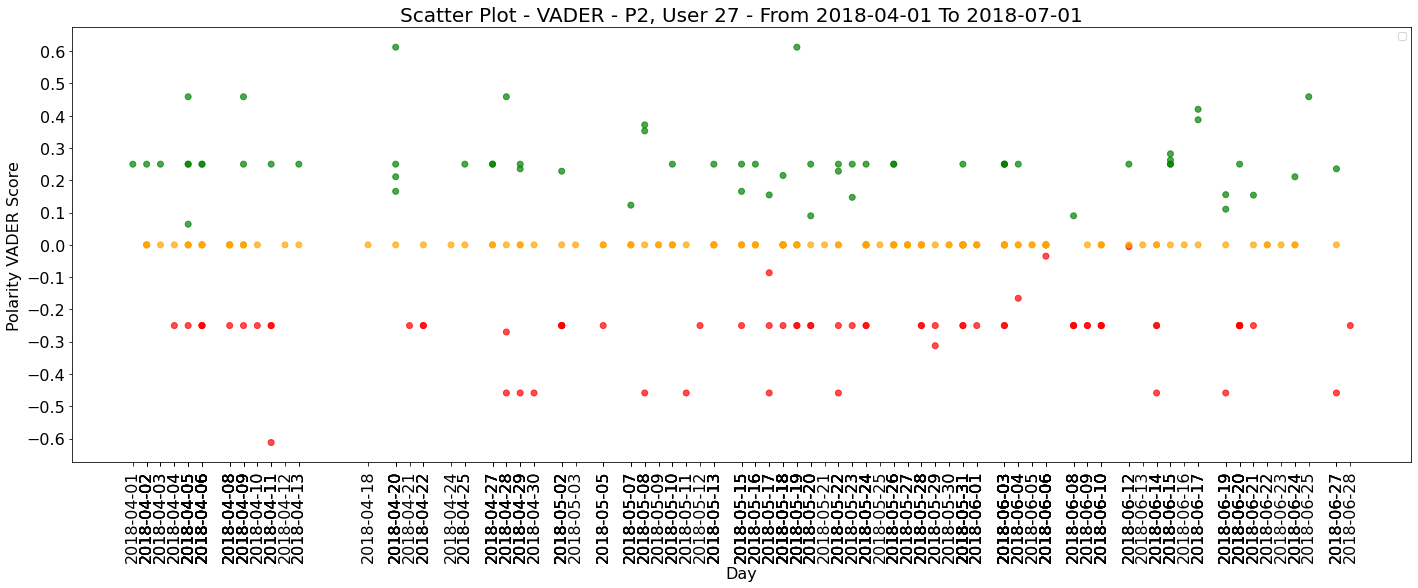

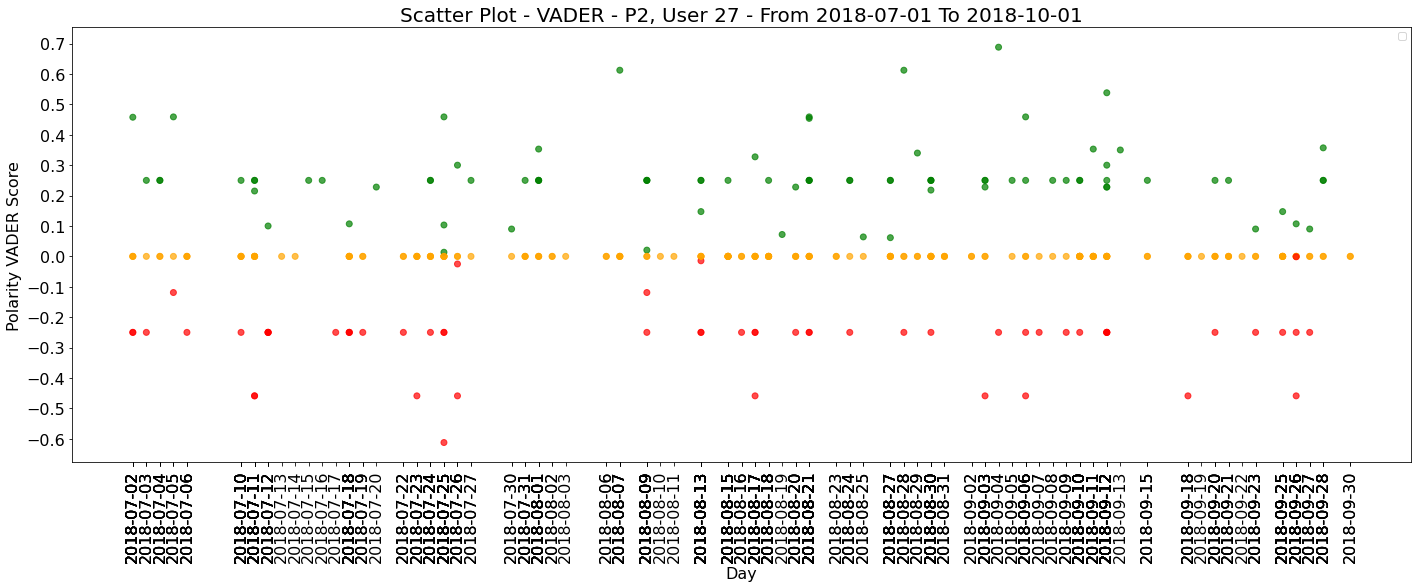

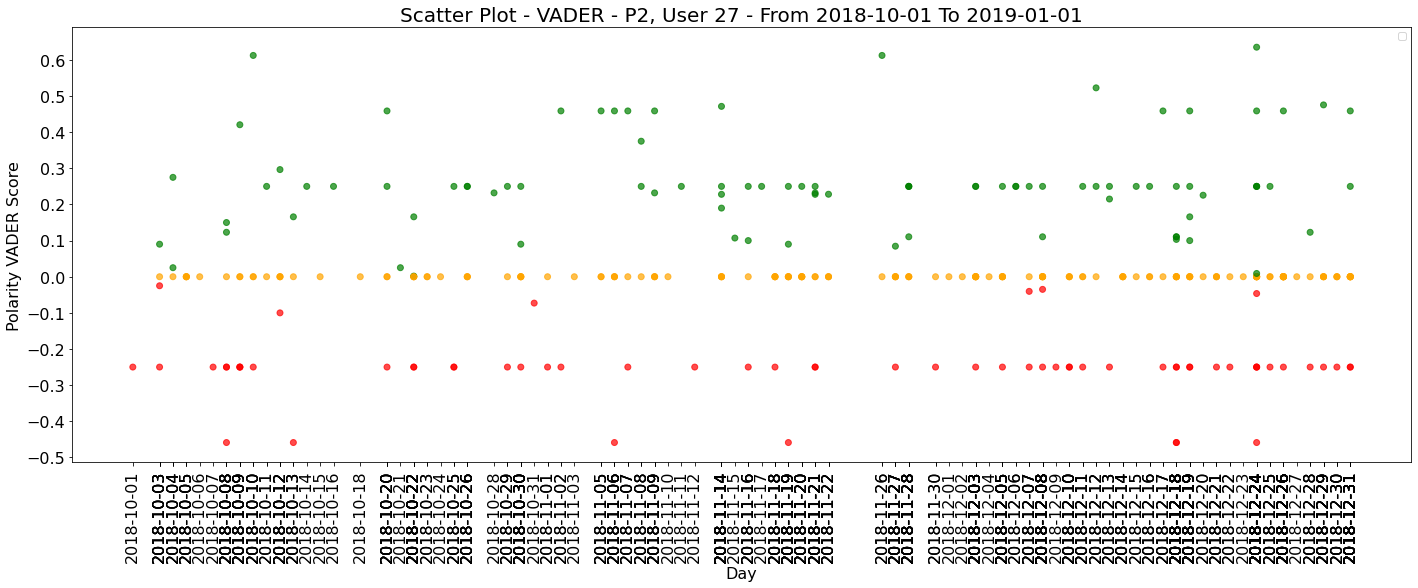

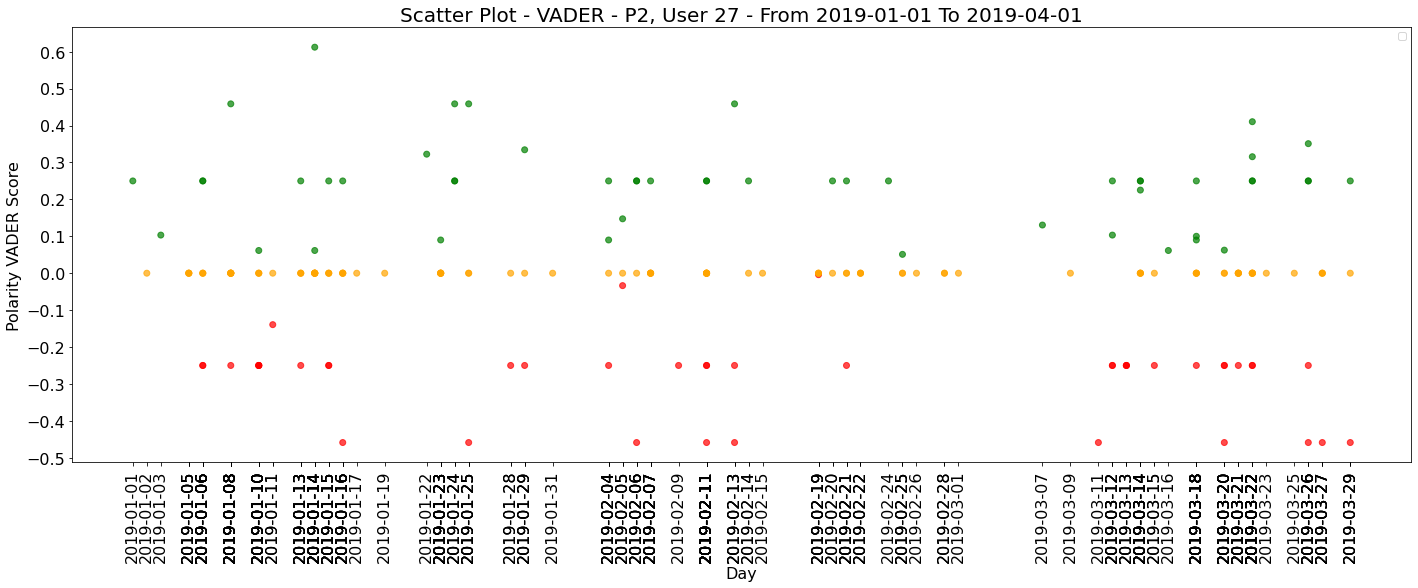

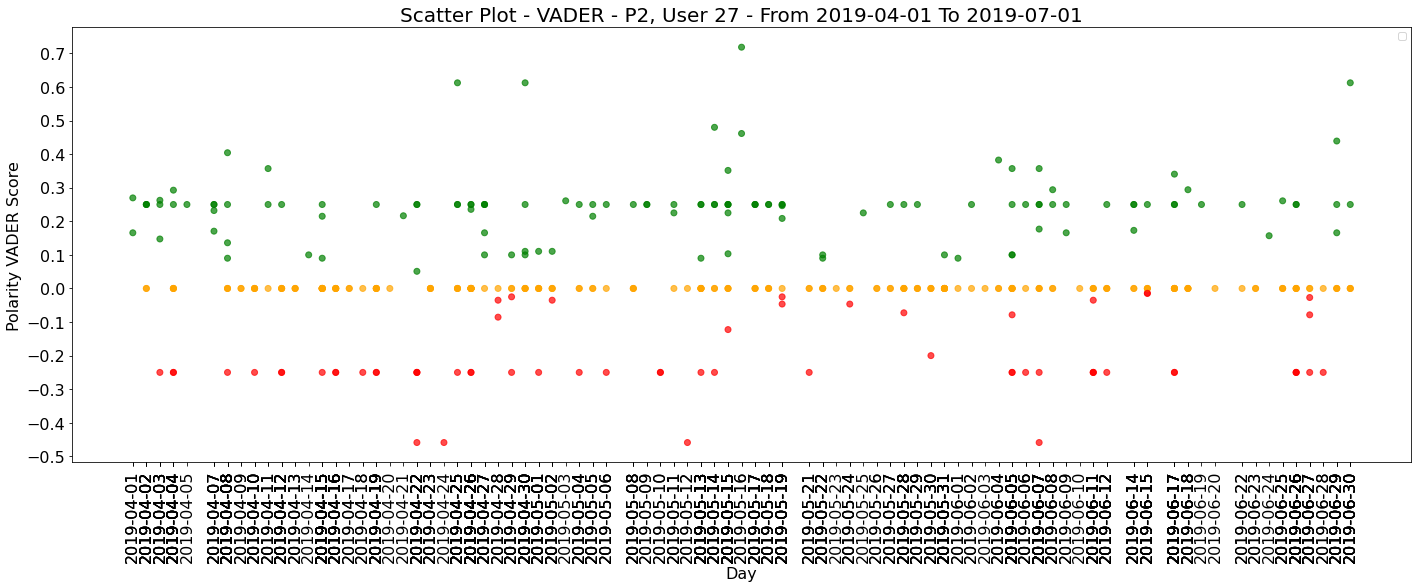

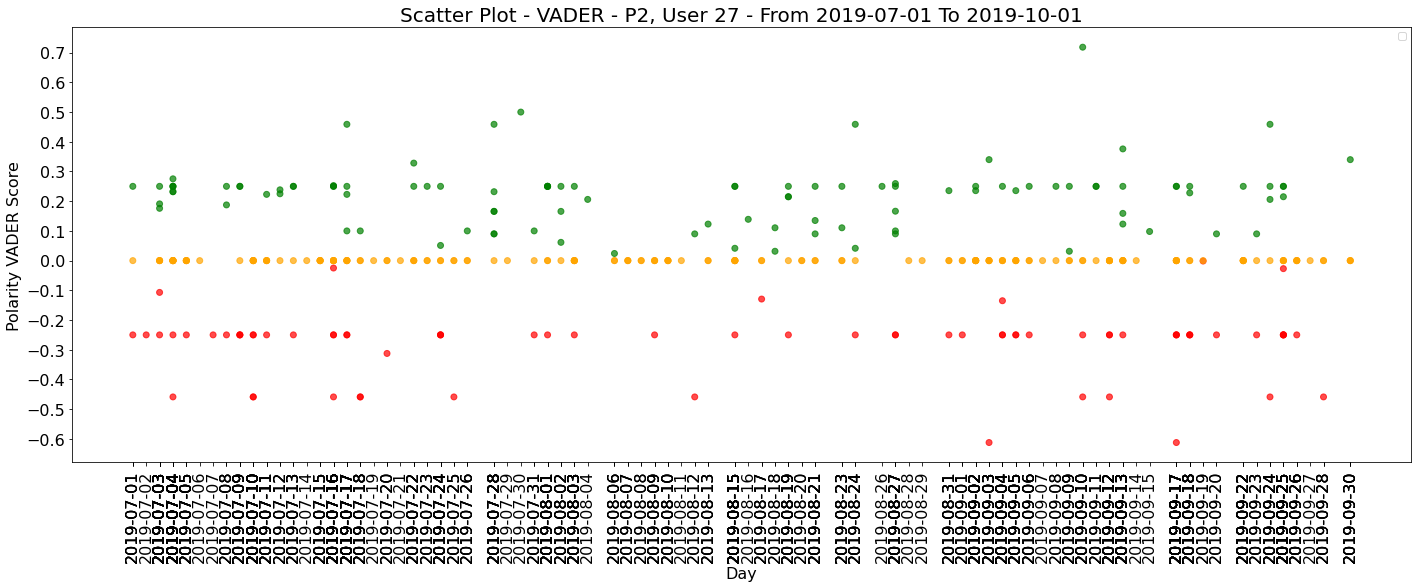

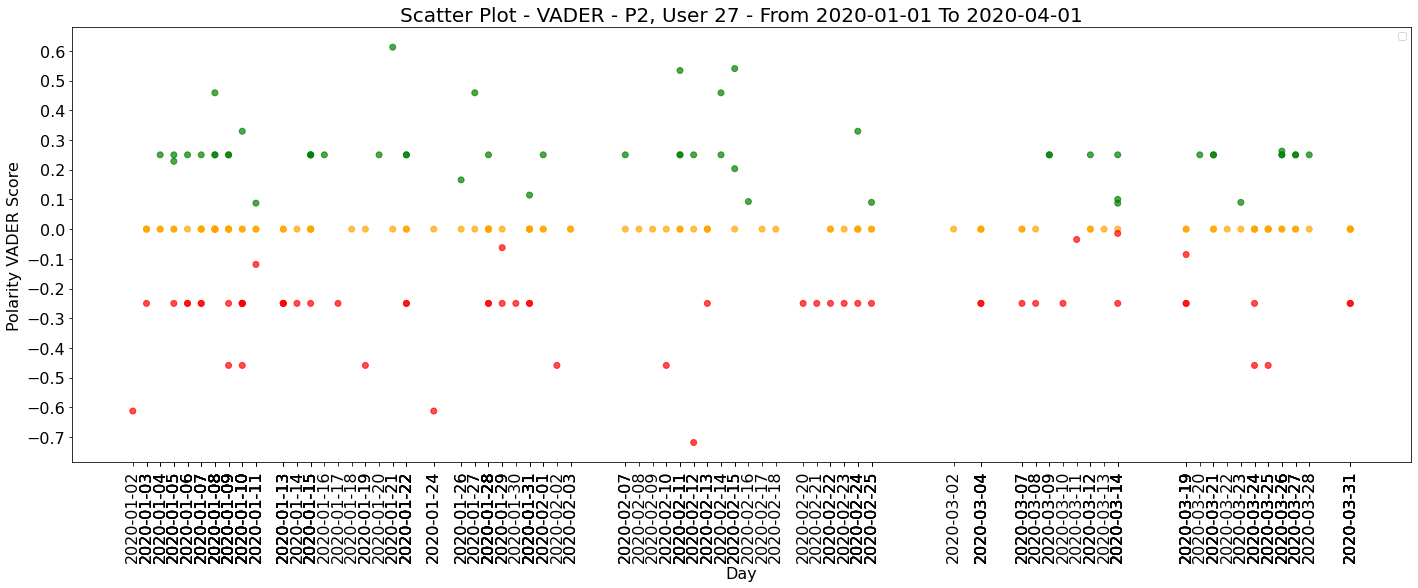

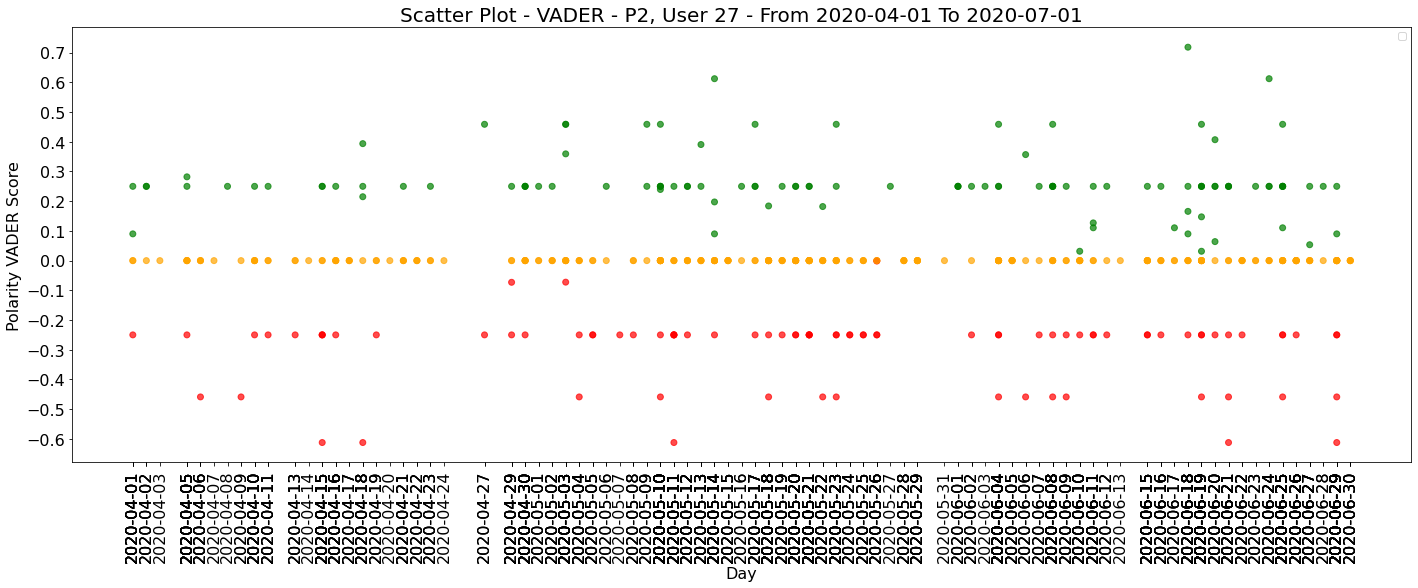

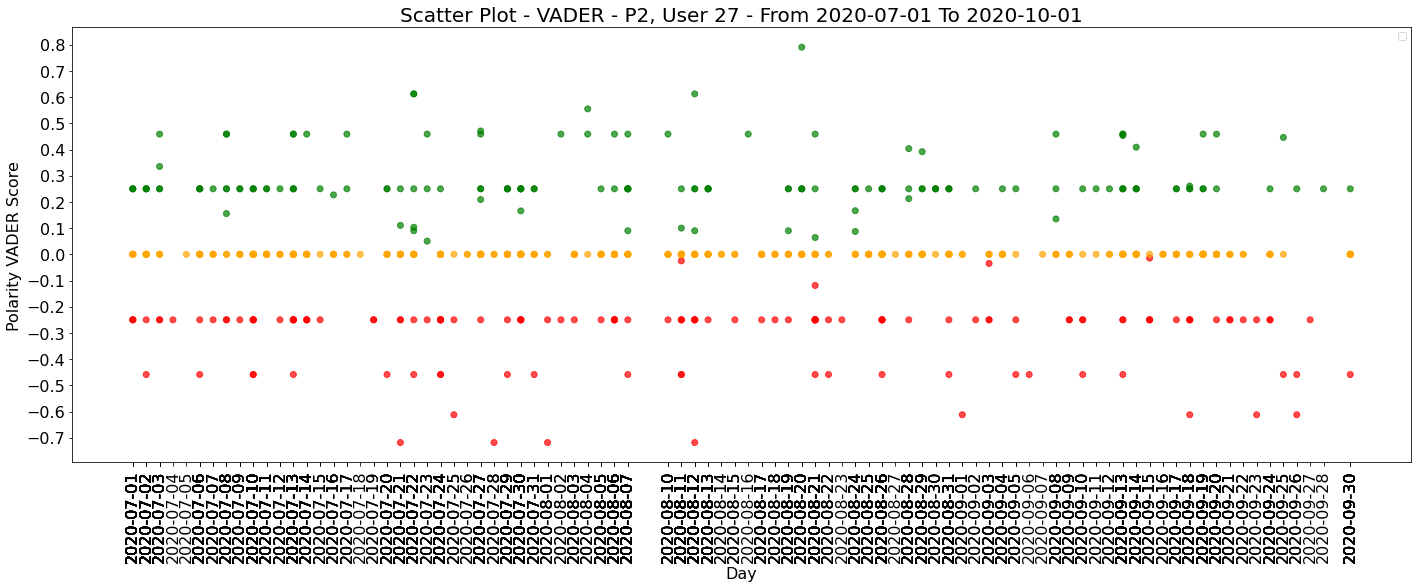

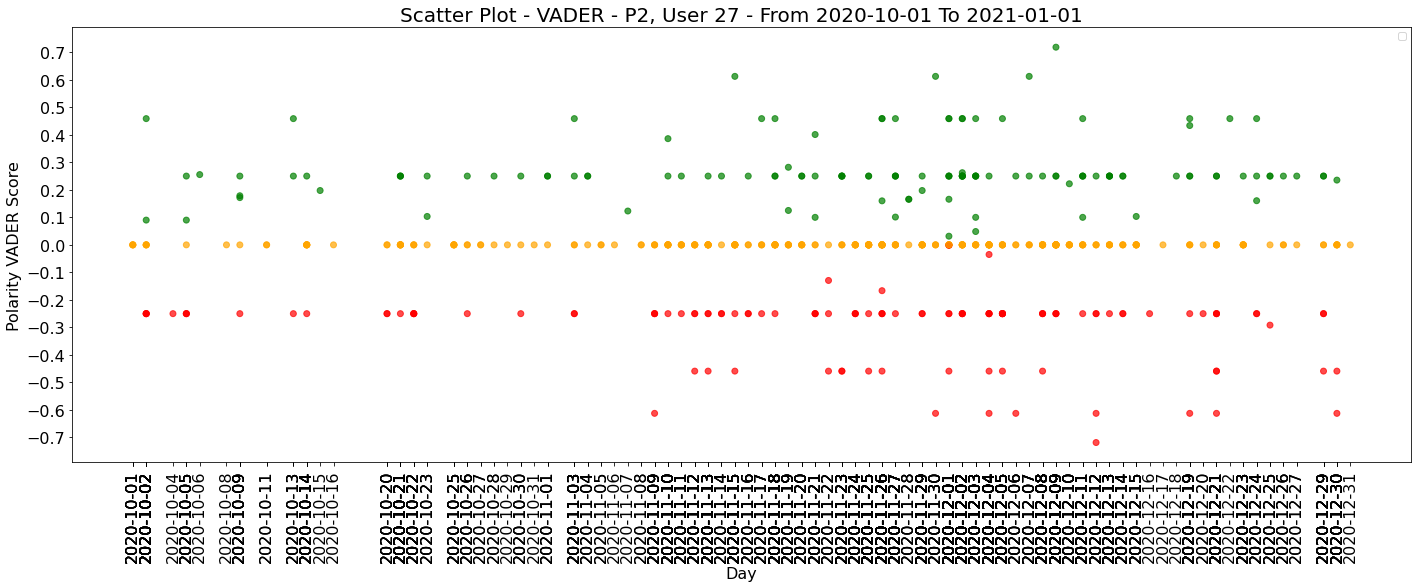

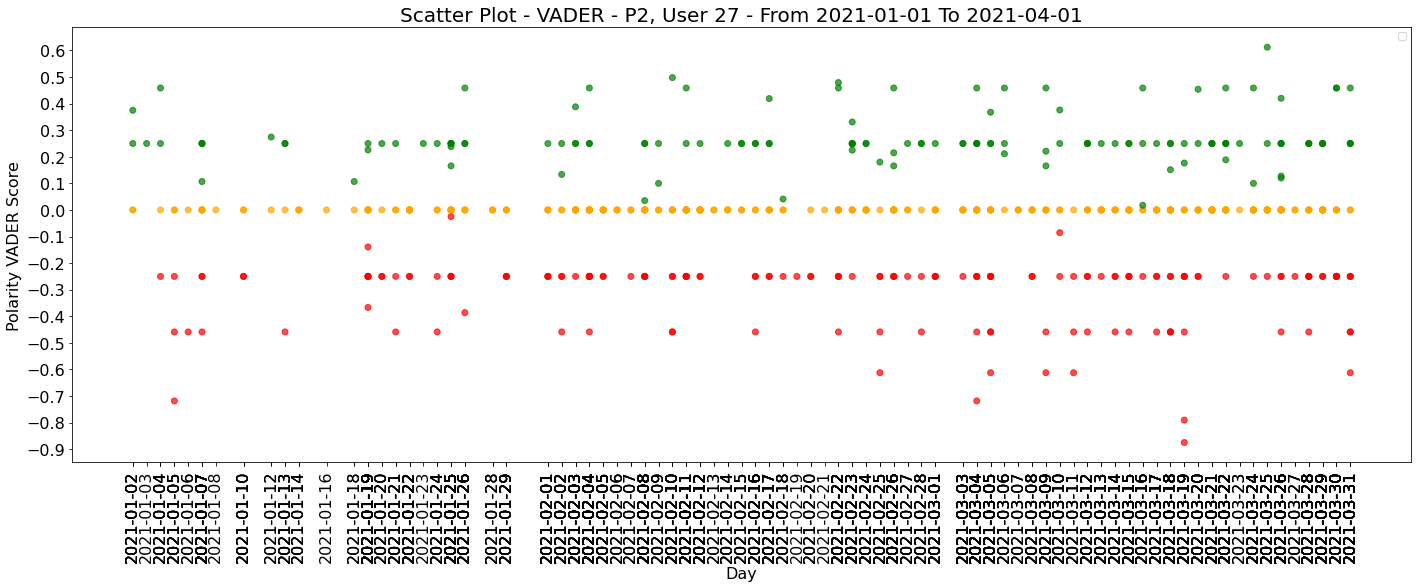

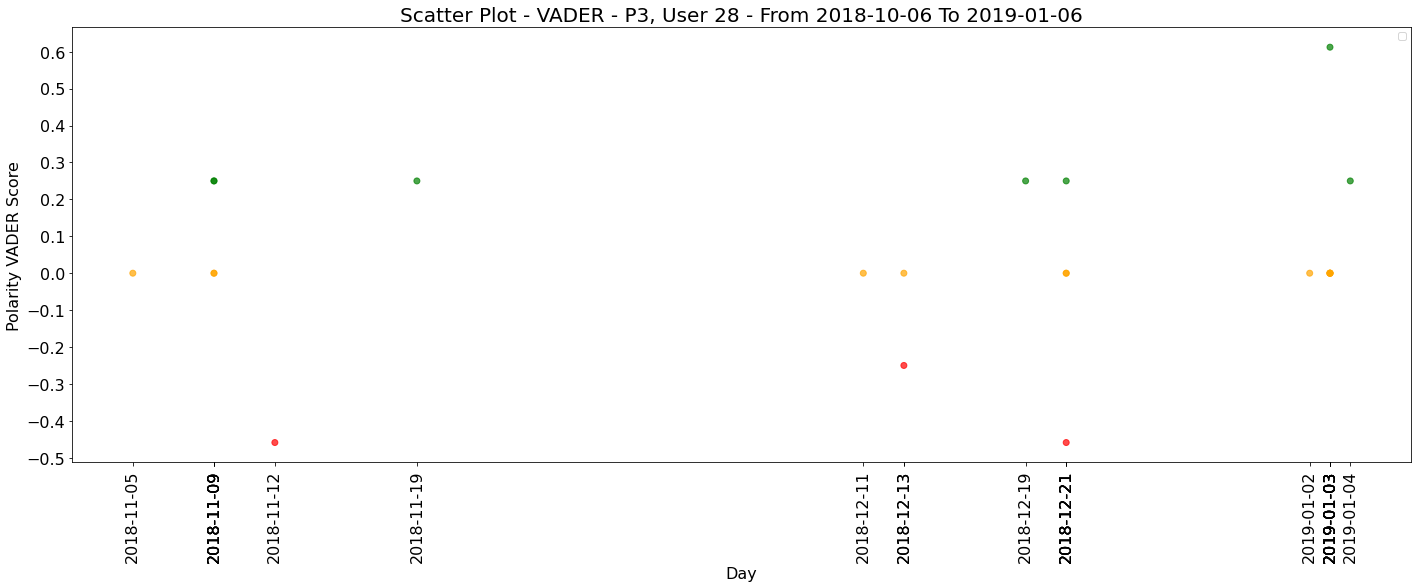

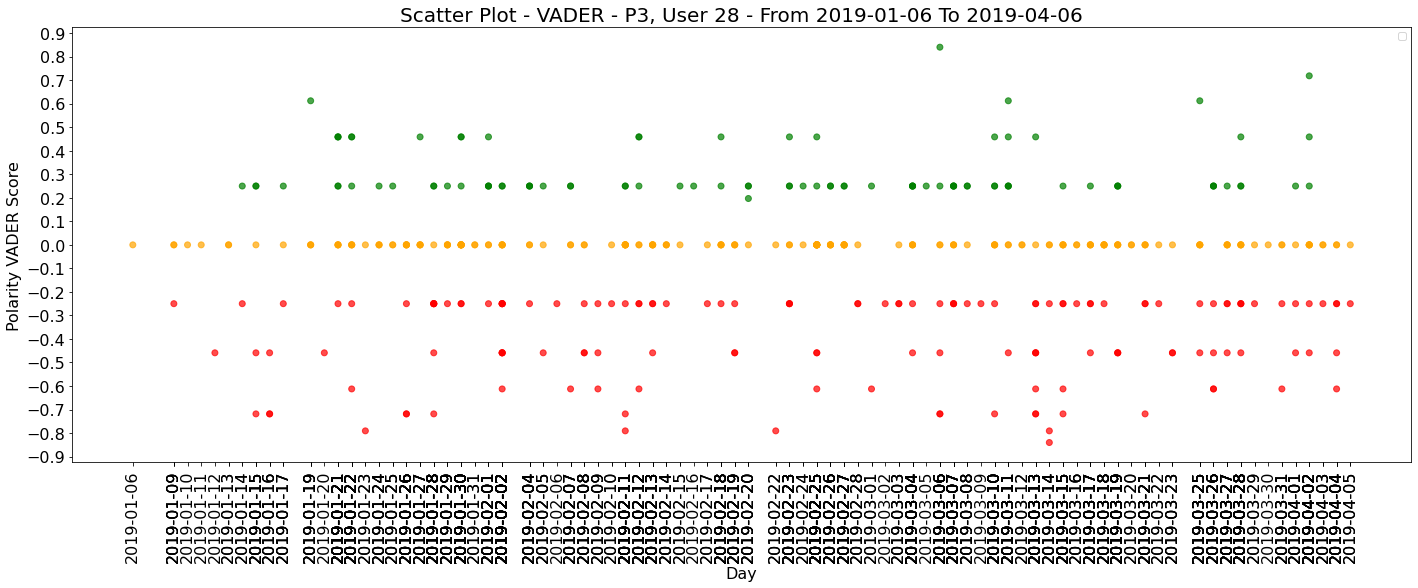

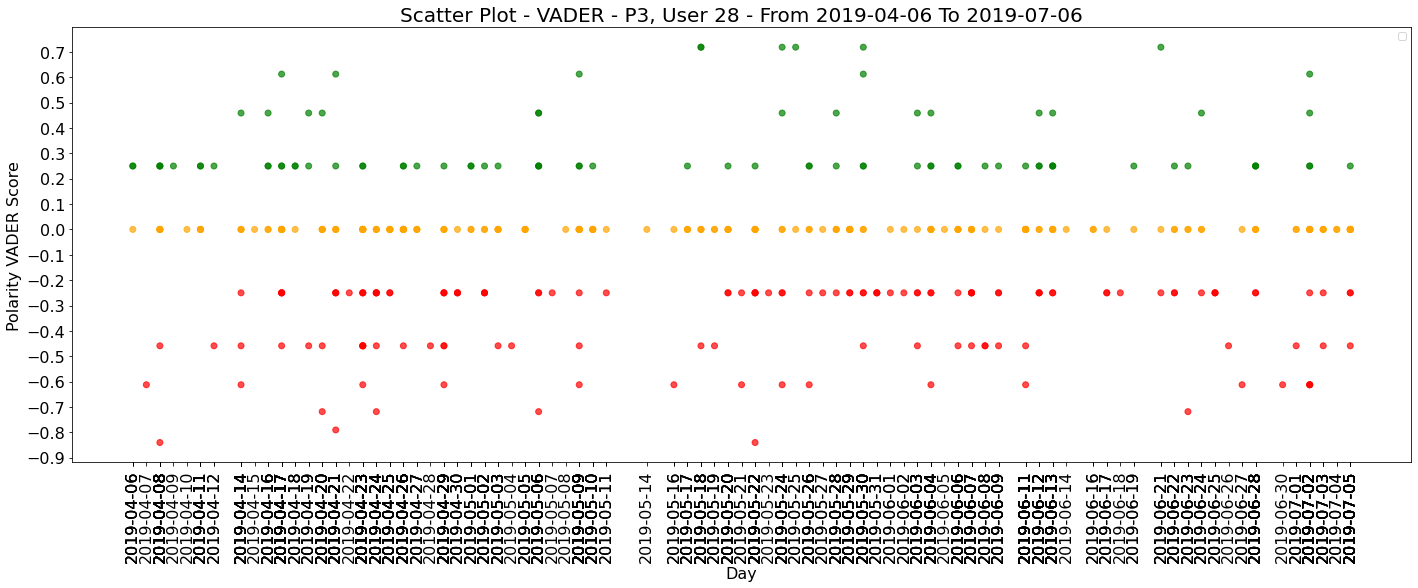

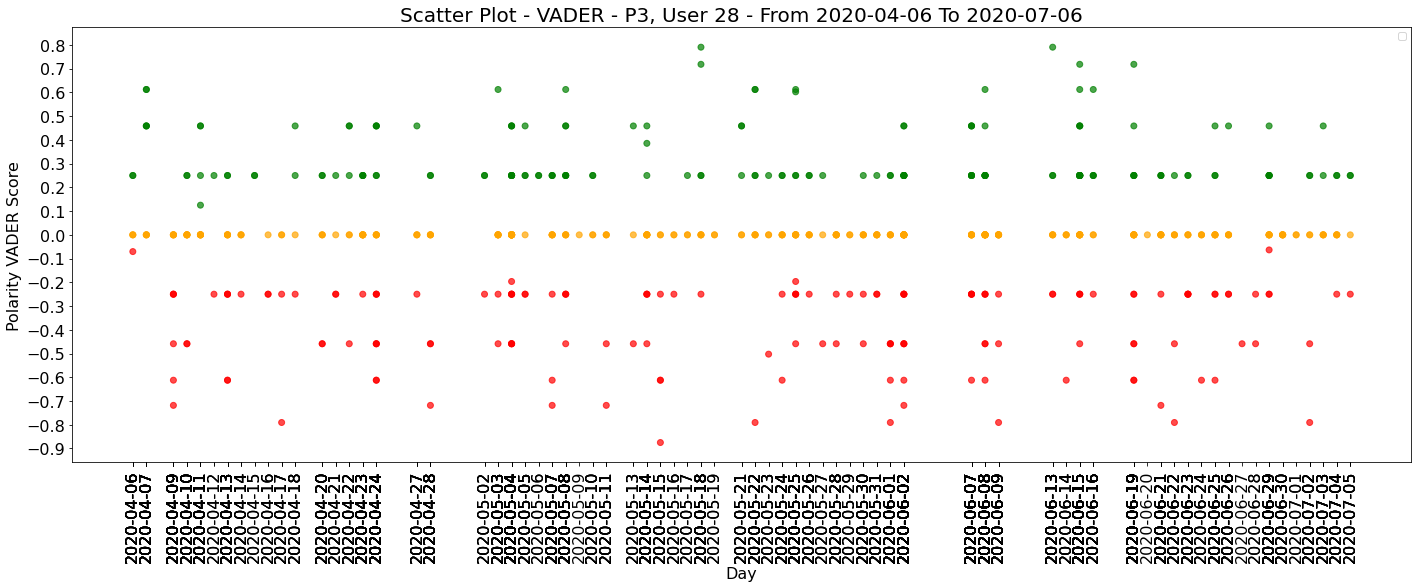

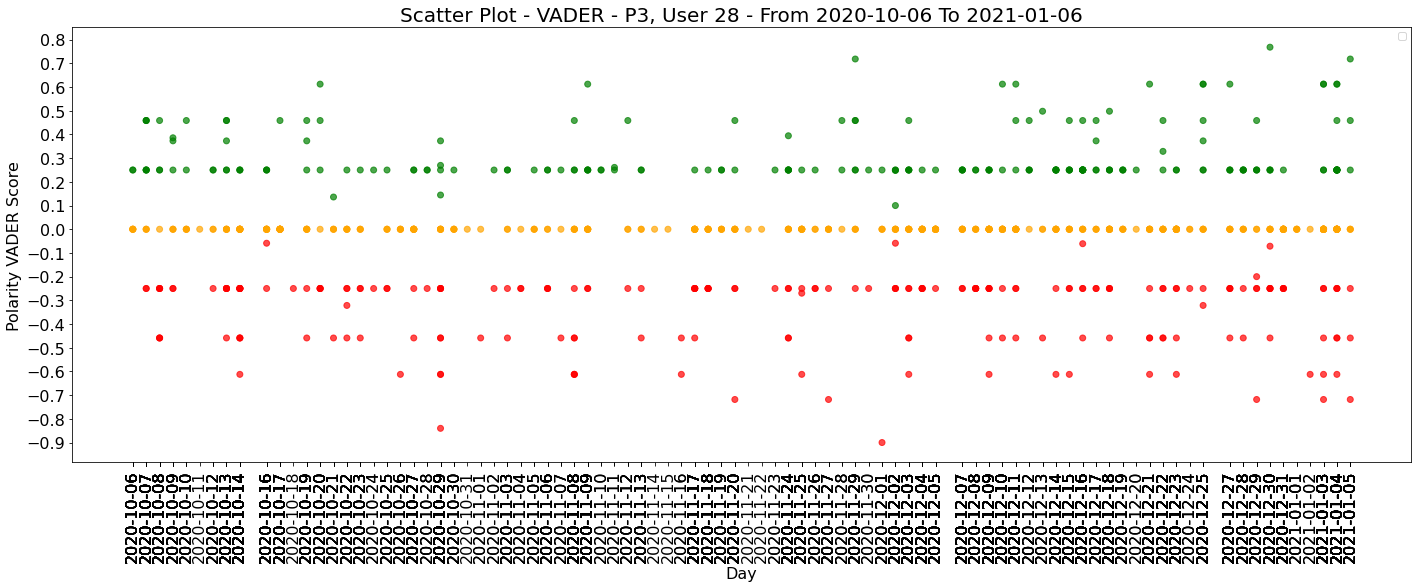

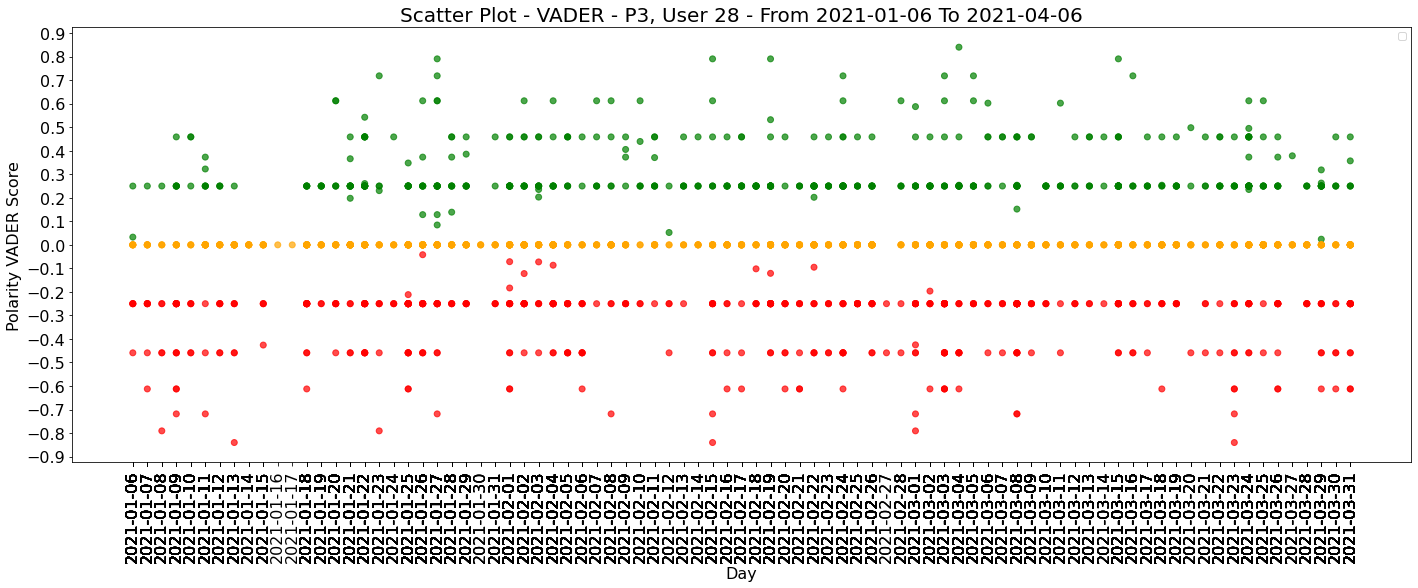

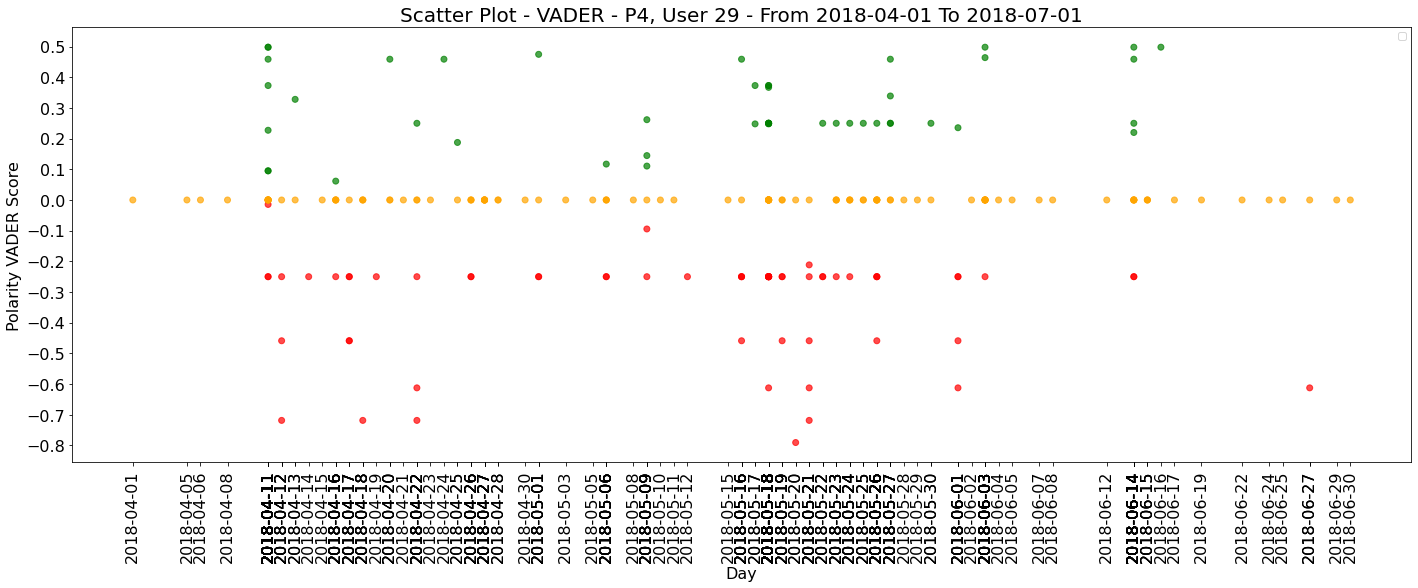

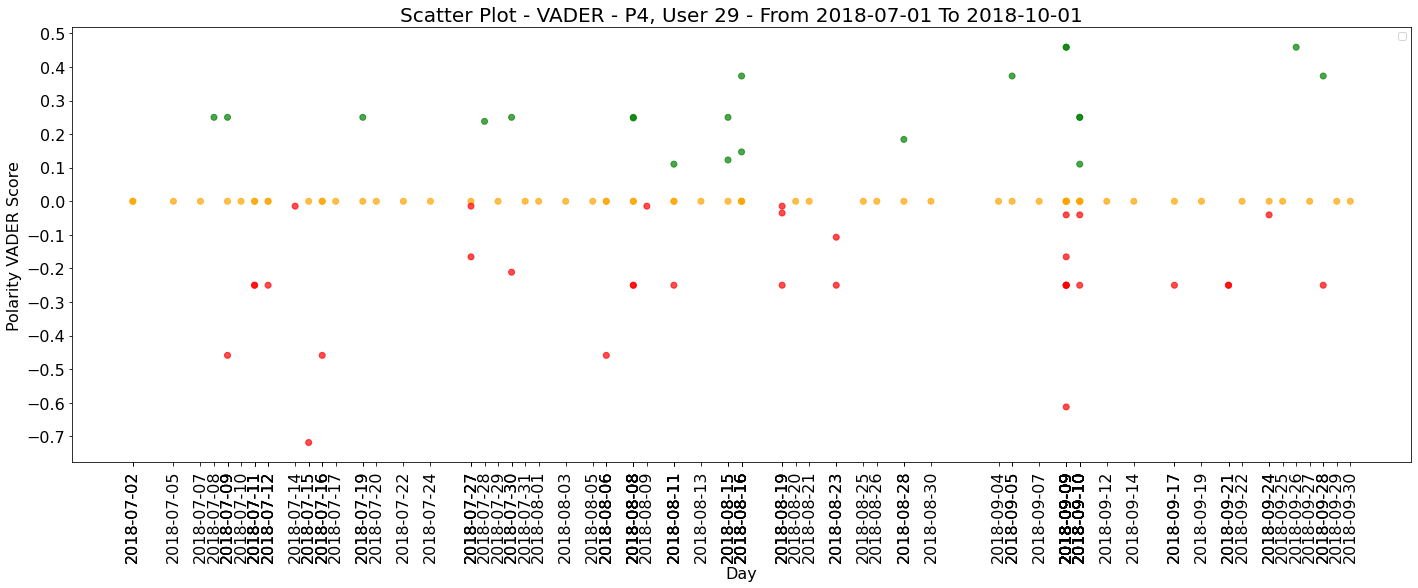

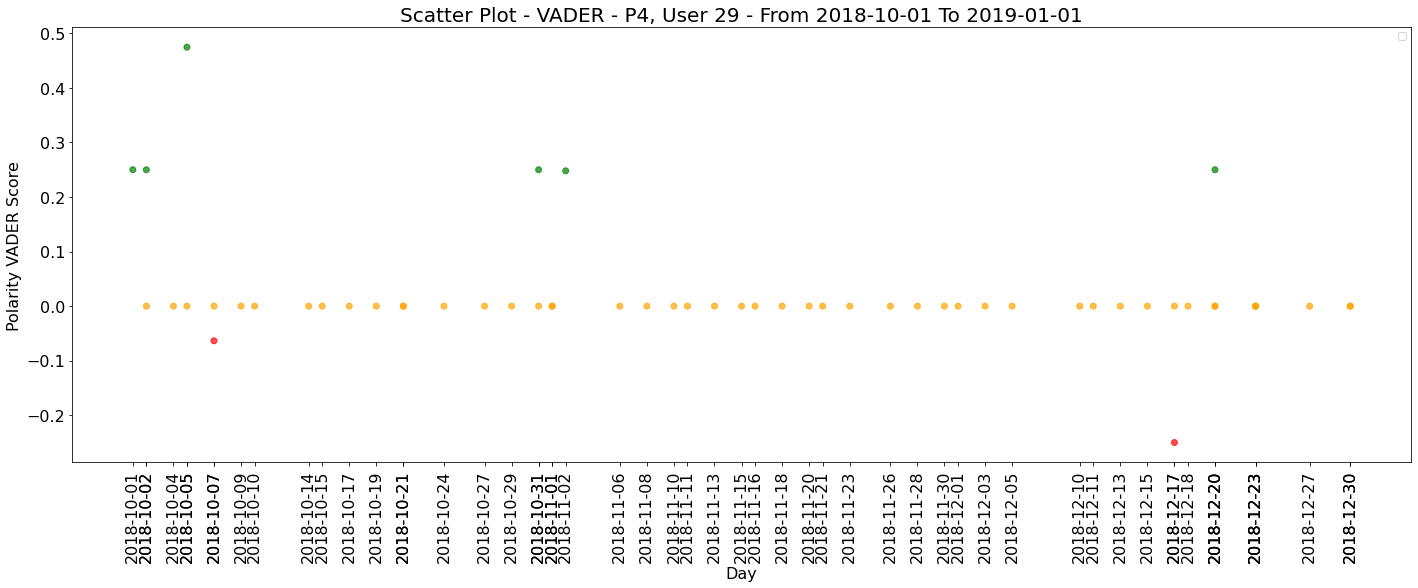

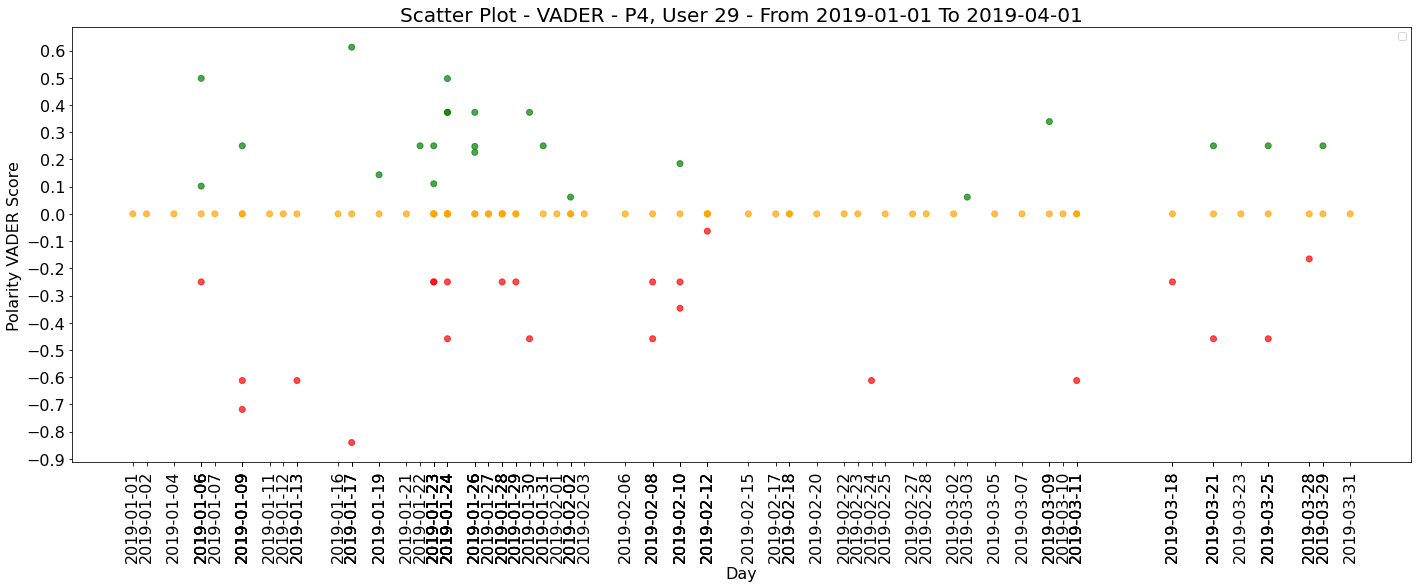

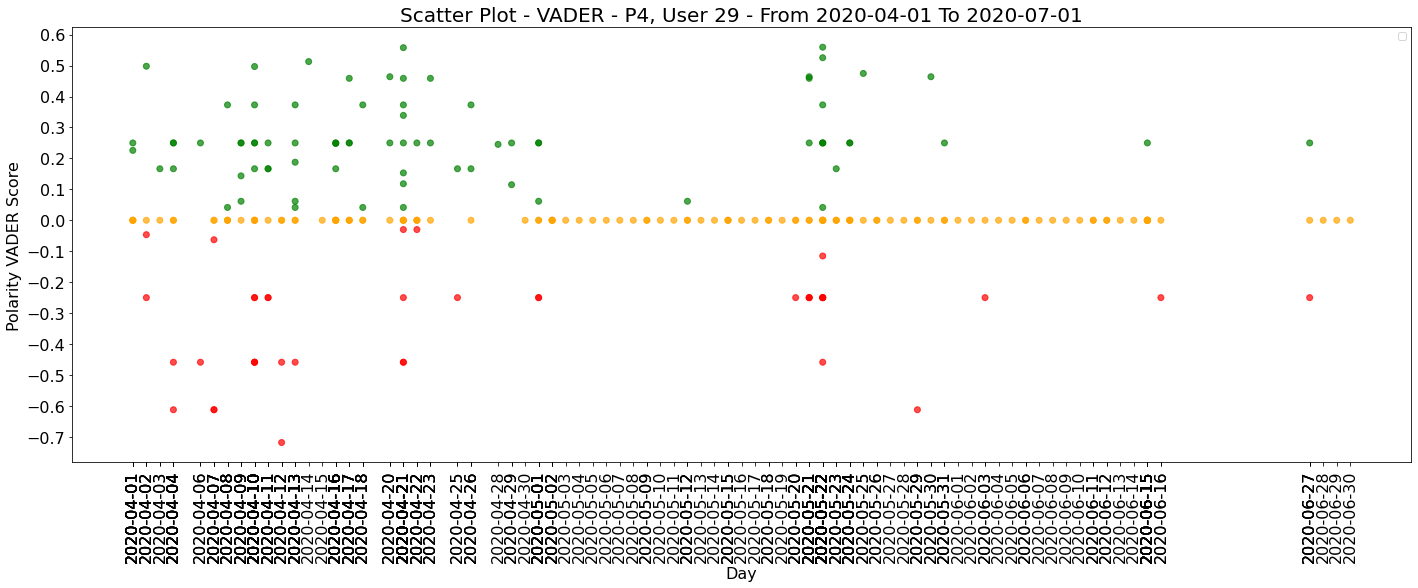

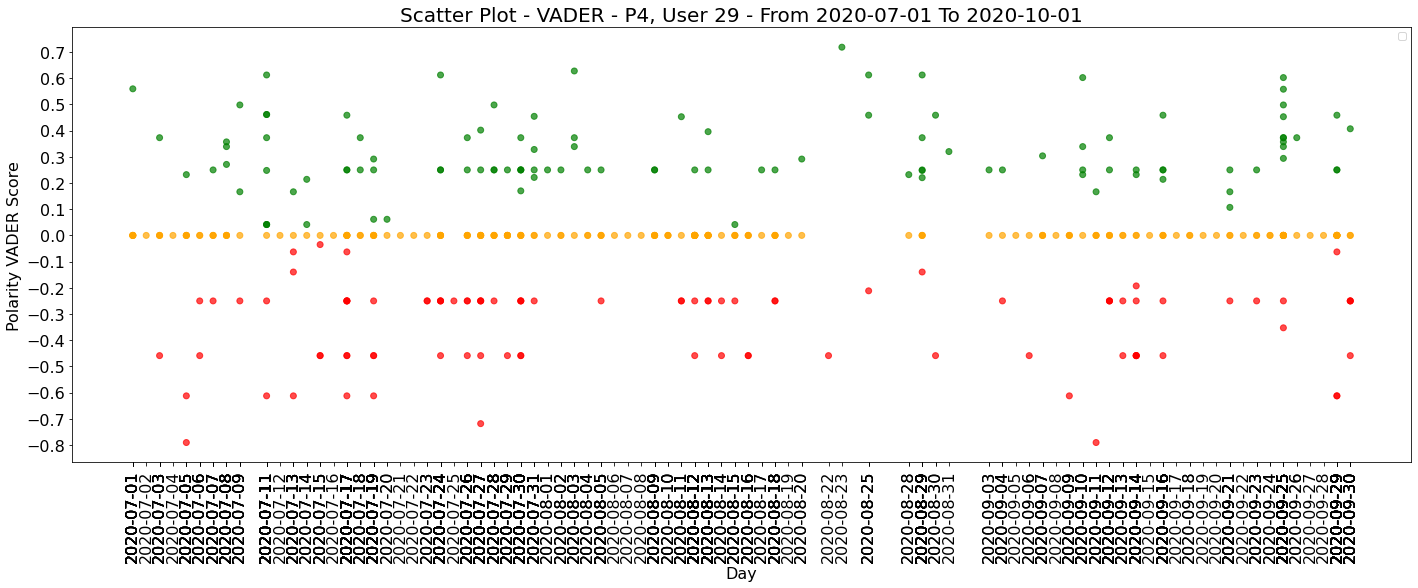

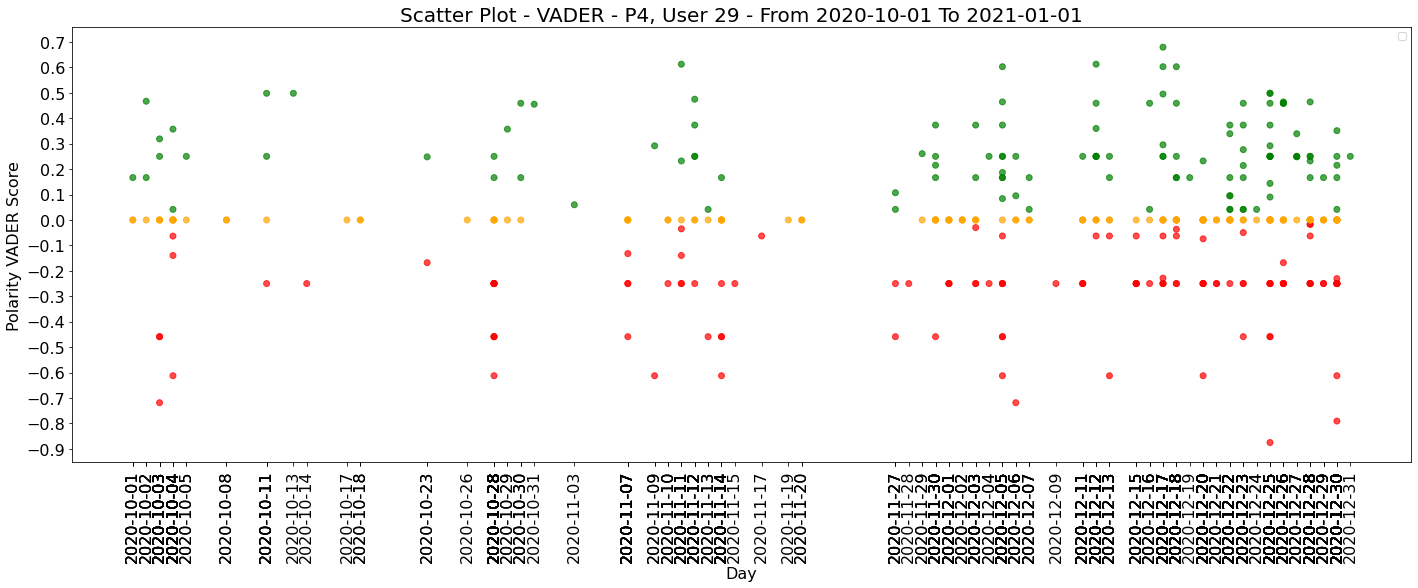

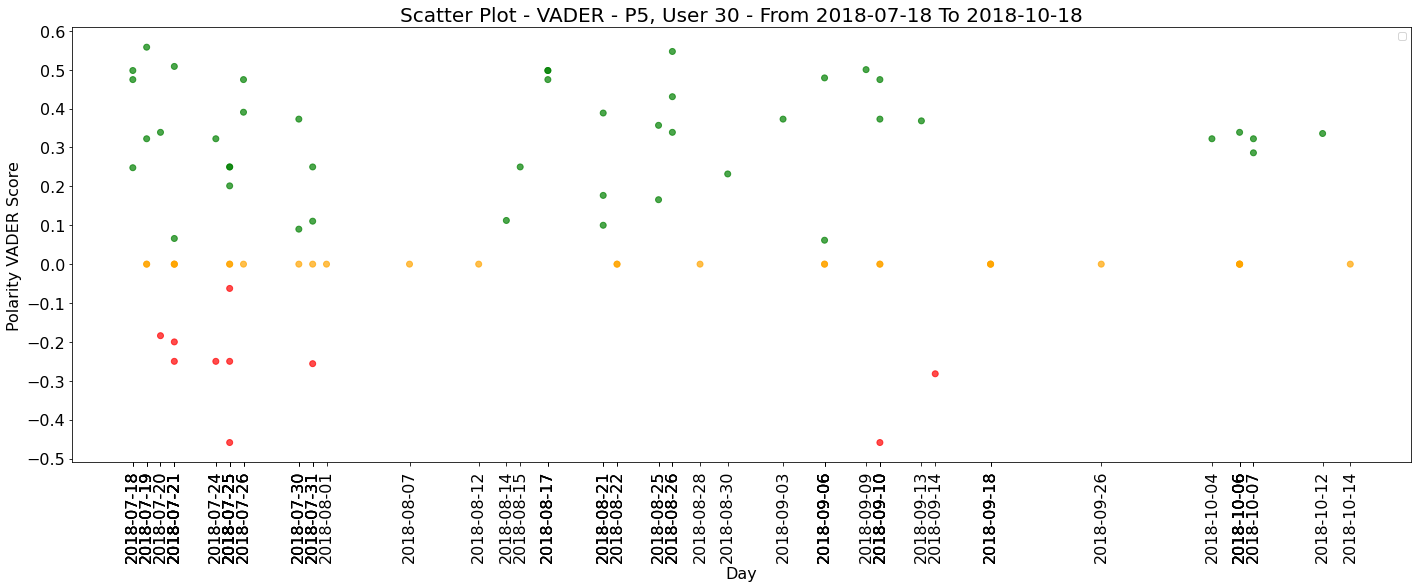

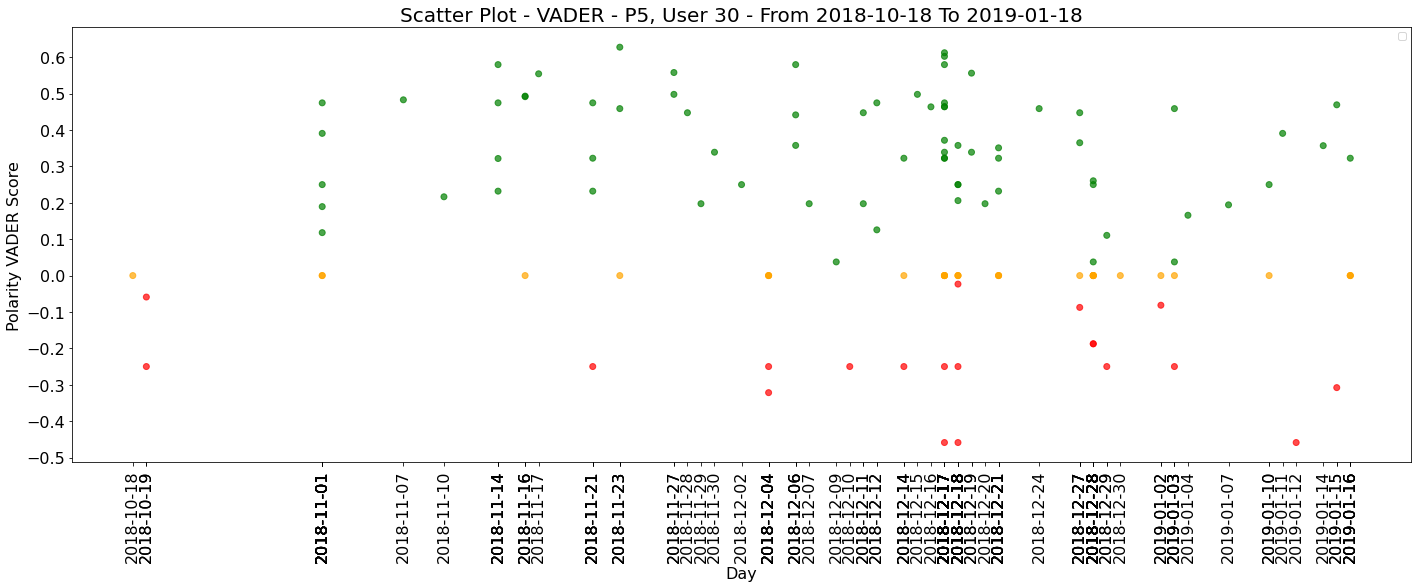

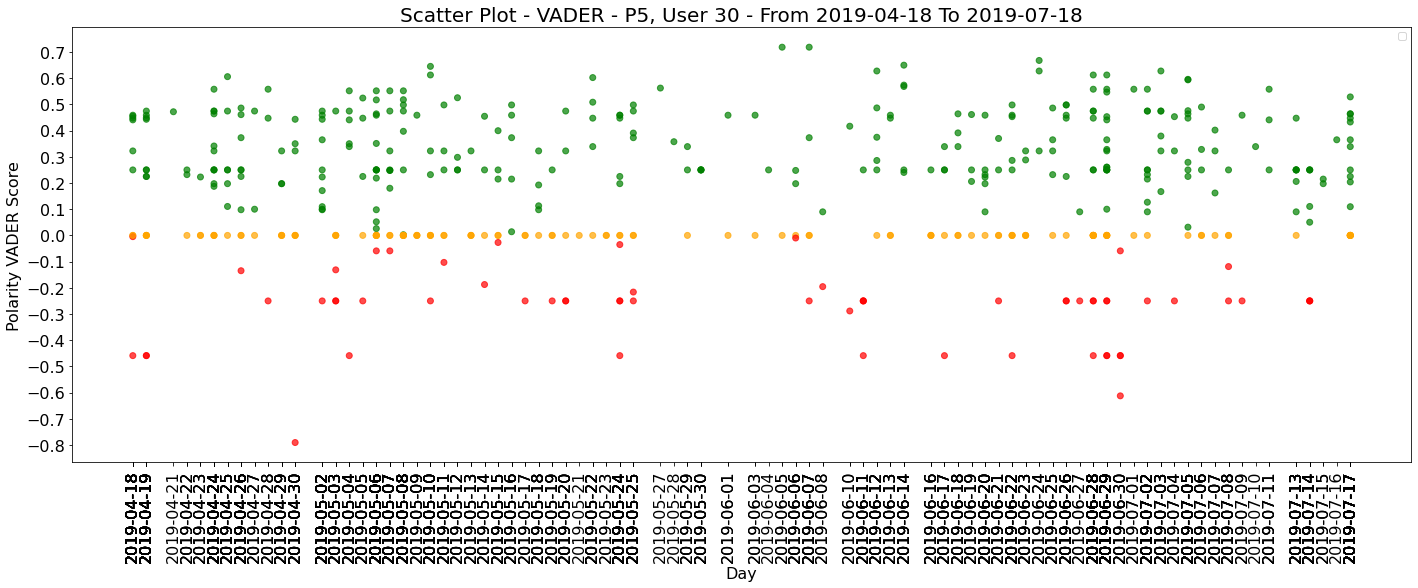

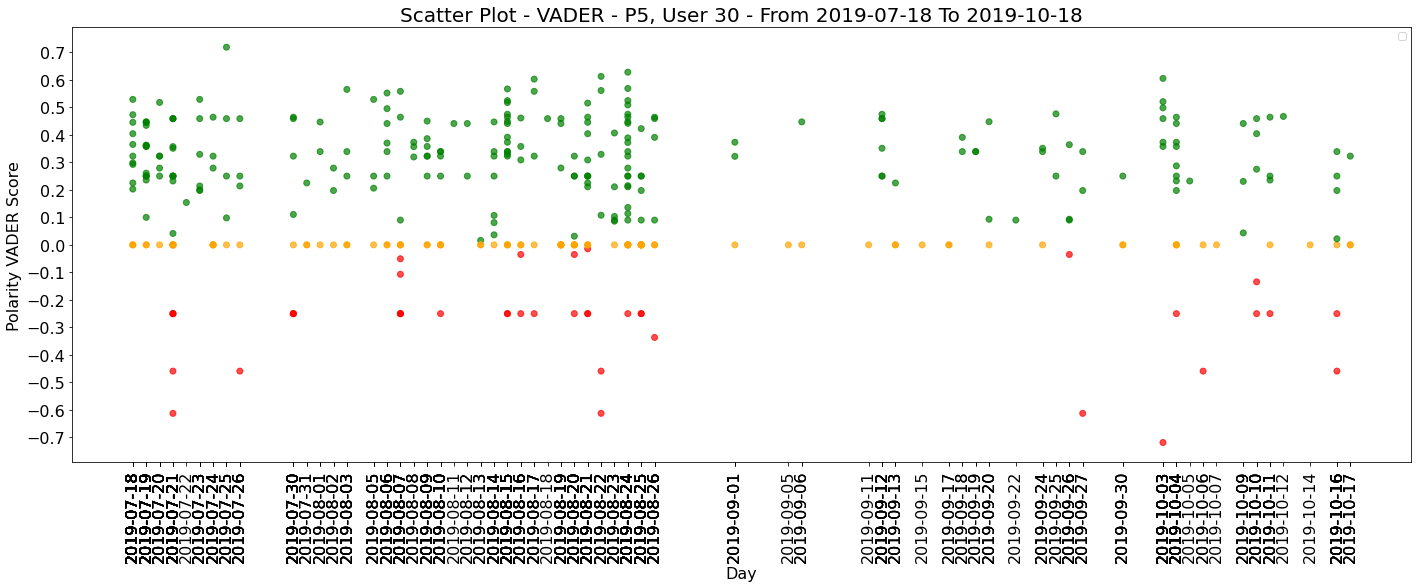

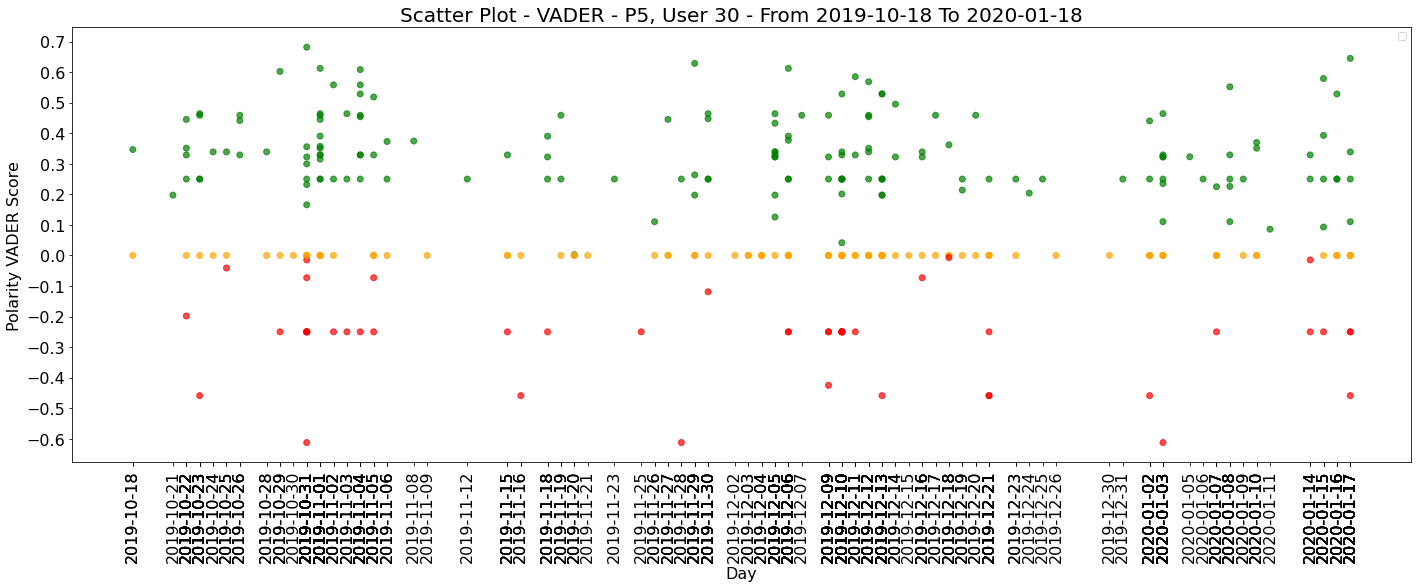

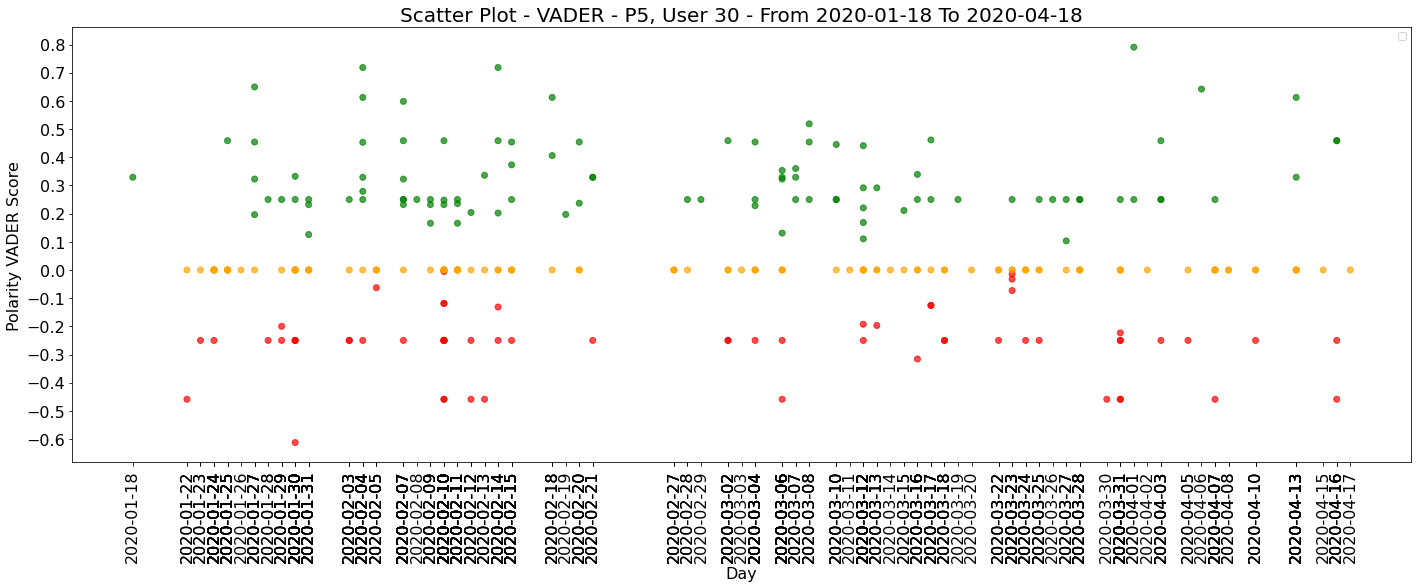

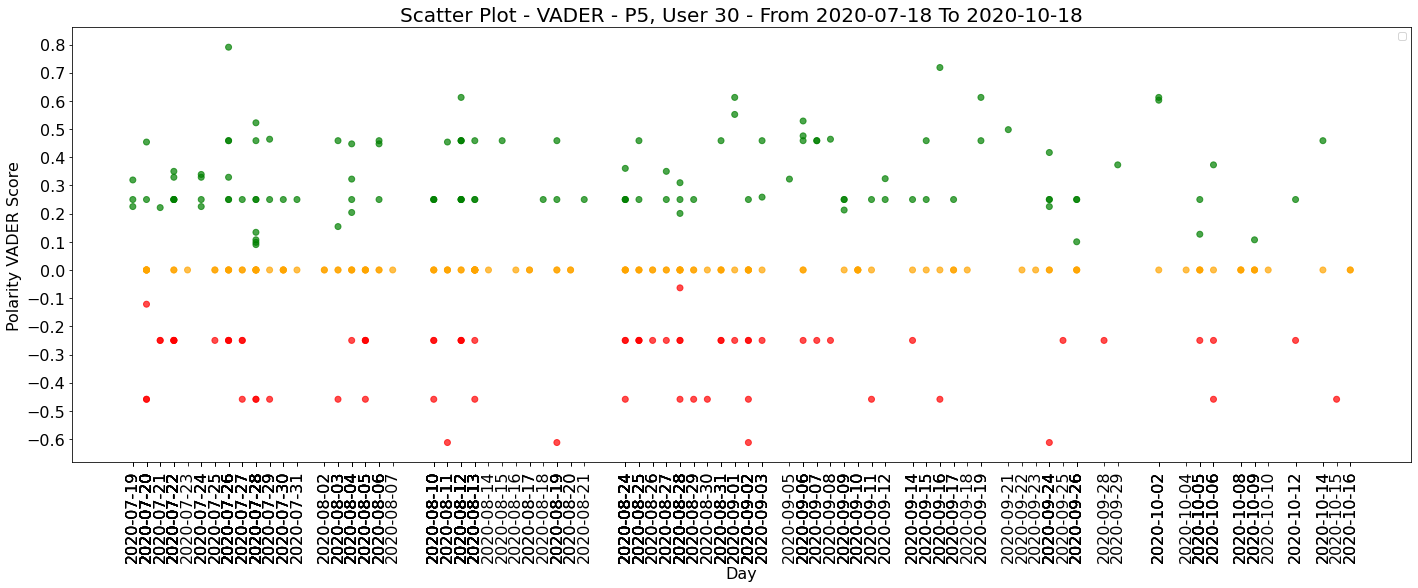

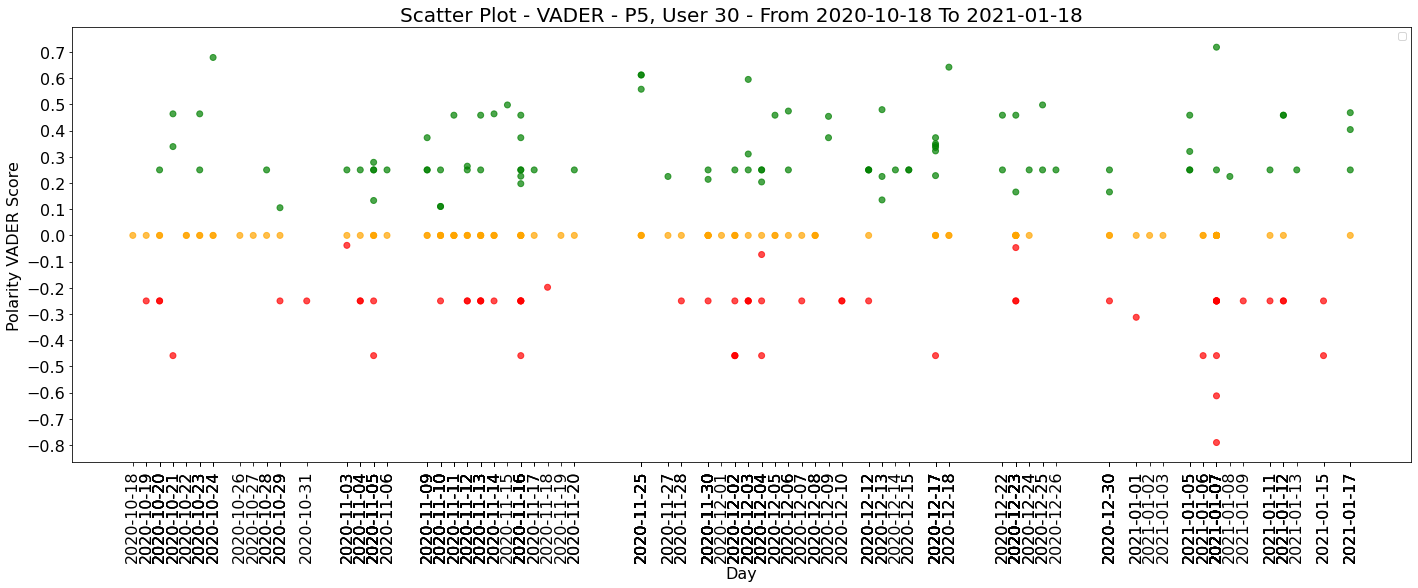

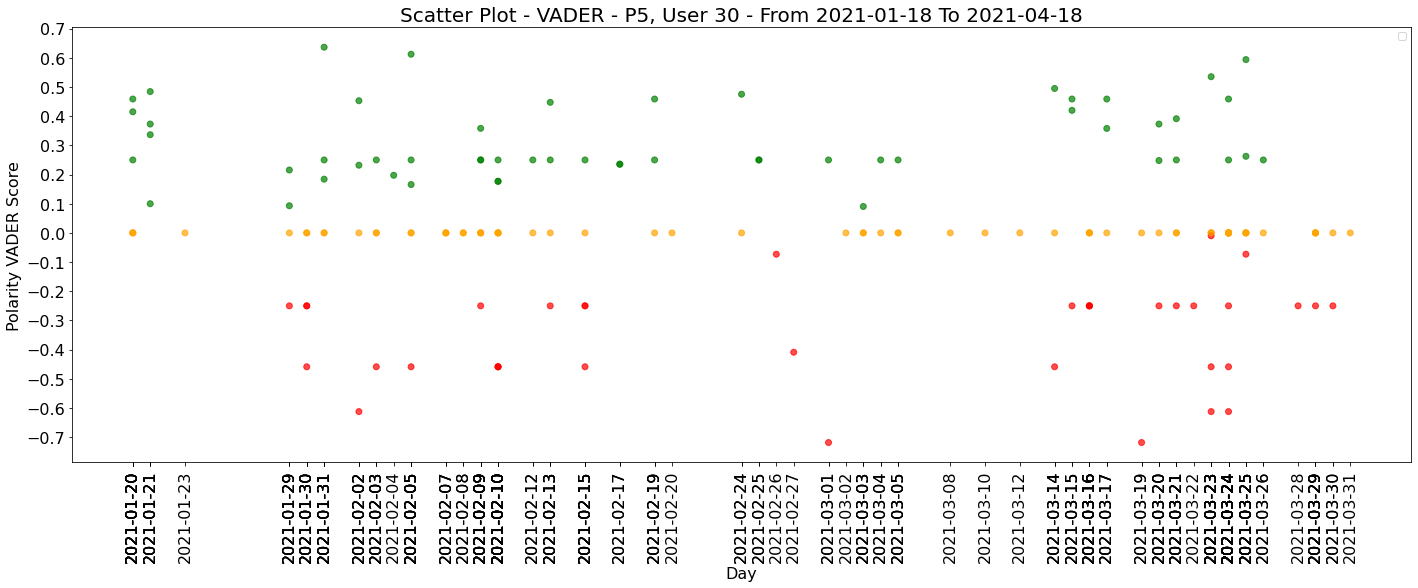

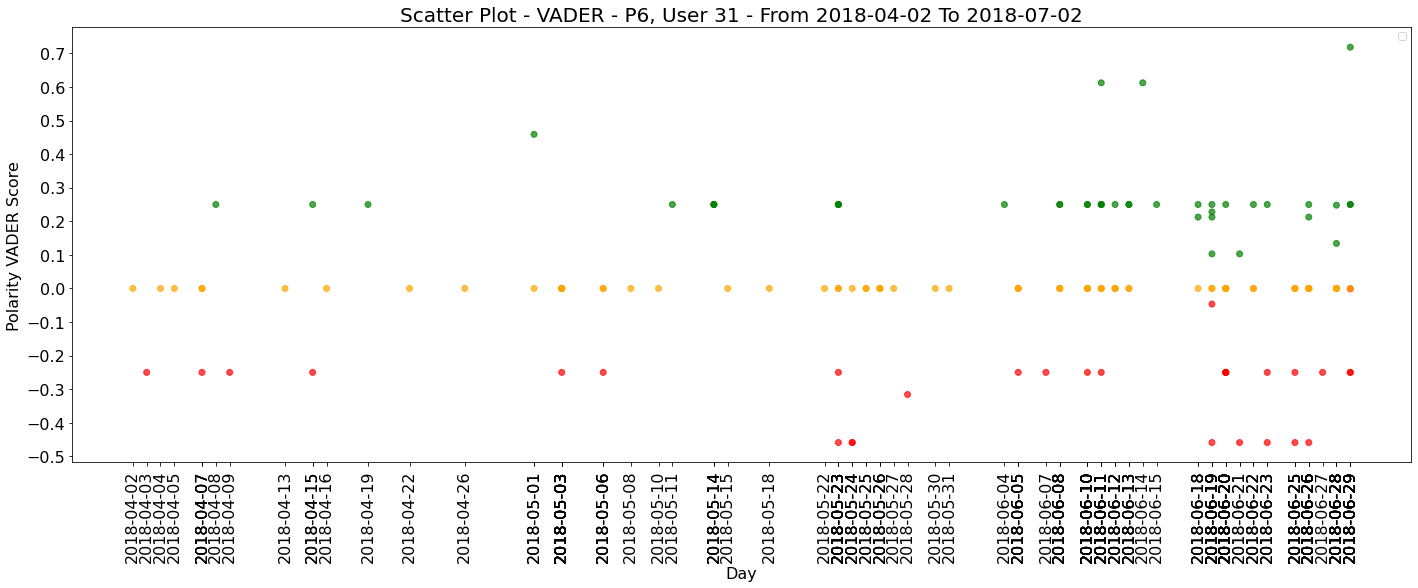

In [ ]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    clean_df(df)
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
#     df.set_index(df["date_minus_time"],inplace=True)
    
    plot_point_chart(df, count, id_user)
    
    count += 1

In [ ]:
tweets_pd = create_tweets_pd(data, id_user)
df = pd.DataFrame(tweets_pd)
df.head()

In [ ]:
def plot_point_chart_pos_neg(df, count, id_user):

    first_date = df.index[0]
    
    for i in range(1,13):
        
        fig, ax = plt.subplots(figsize=(24, 8))

        end_date = first_date + relativedelta(months=+3)
        mask = (df.index >= first_date) & (df.index < end_date)
        new_df = df.loc[mask]
        
        x_ticks = new_df.index

        plt.xticks(x_ticks, rotation='vertical', fontsize=16)
        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity Score Mean', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
    
        x = new_df.index
        y1 = new_df['vader_score_pos']
        y2 = new_df['vader_score_neg']
        y3 = new_df['mean']

        plt.title('Scatter Plot - Polarity Means - VADER - P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
        plt.axhline(y=0.0, color='orange', linestyle='-', alpha=0.7, linewidth=4)
        
#         # plotting the line 1 points 
#         plt.scatter(new_df.index, new_df['final_score_pos'], label = "pos", marker='o', color = 'green')

#         # plotting the line 2 points 
#         plt.scatter(new_df.index, new_df['final_score_neg'], label = "neg", marker='o', color = 'red')
        
        
        # plotting the line 1 points 
        plt.plot(new_df.index, new_df['vader_score_pos'], label = "pos", marker='o', markerfacecolor='none', color = 'green')

        # plotting the line 2 points 
        plt.plot(new_df.index, new_df['vader_score_neg'], label = "neg", marker='o', markerfacecolor='none', color = 'red')
        
        # plotting the line 3 points 
        plt.plot(new_df.index, new_df['mean'], label = "mean", marker='o', markerfacecolor='none', color = 'gray', linestyle='--')
        
        plt.legend()
        
#         plt.savefig('images/scatter_pol_means_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        plt.show()
        
        first_date = end_date

In [ ]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    clean_df(df)
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)
    
    df_pos = df.query(alg_to_analyze[1] + " == 'pos'")
    df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())
    
    df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
    df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())
    
    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['vader_score_pos', 'vader_score_neg']
    
    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
    
    plot_point_chart_pos_neg(df_final, count, id_user)
    
    count += 1

In [ ]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

In [ ]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    
    clean_df(df)

    df = df.sort_values(by='created_at')

    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)

    df_pos = df.query(alg_to_analyze[1] + " == 'pos'")
    df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())

    df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
    df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())

    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['vader_score_pos', 'vader_score_neg']

    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

    g = sns.pairplot(df_final, diag_kind="kde", height=4)
    g.map_lower(sns.kdeplot, levels=4, color=".2")

    # Map the plots to the locations
    g = g.map_upper(plt.scatter)
    g = g.map_upper(corr)
    g = g.map_lower(sns.kdeplot, cmap = 'Reds')
    g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');
    
    count += 1

In [ ]:
df_final

In [ ]:
tweets = [data[d]['tweets'] for d in data]

final_tweets = []
for i in tweets:
    final_tweets.extend(i)

df = pd.DataFrame(final_tweets)

del df[0]
del df[1]
del df[4]
del df[5]
del df[6]
del df[18]

df.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df(df)

df = df.sort_values(by='created_at')

# print(df)

df["created_at"] = pd.to_datetime(df["created_at"])
df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
# df.set_index(df["date_minus_time"],inplace=True)

df_final = df.query("vader_sentiment_analysis_polarity == 'pos' or vader_sentiment_analysis_polarity == 'neg'")

# df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
# df_pos['final_score_mean'] = df_pos['final_score'].resample('D').mean()

# print(df_pos)


# df_neg = df.query("final_polarity == 'neg'")
# df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())

# df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
# df_final = df_final.fillna(0)
# df_final.columns = ['final_score_pos', 'final_score_neg']

# df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

# df_final.head()

sns.pairplot(df_final, diag_kind="kde", height=6, hue="vader_sentiment_analysis_polarity")

In [ ]:
frames = []

count = 1
for c in data:
    id_user = c
    
    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        tweets_pd = create_tweets_pd(data, id_user)
        df = pd.DataFrame(tweets_pd)

        clean_df(df)

        df = df.sort_values(by='created_at')

        df["created_at"] = pd.to_datetime(df["created_at"])
        df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
        df.set_index(df["date_minus_time"],inplace=True)

        df_pos = df.query(alg_to_analyze[1] + " == 'pos'")

        df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())

        df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
        df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())

        df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
        df_final = df_final.fillna(0)
        df_final.columns = ['vader_score_pos', 'vader_score_neg']

        df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
        df_final.loc[df_final['mean'] > 0, ['mean_polarity']] = 'pos'
        df_final.loc[df_final['mean'] < 0, ['mean_polarity']] = 'neg'

    #     df_final = df_final.drop(df_final["mean_polarity"])
        df_final = df_final.dropna(how = 'any')

        df_final['id_user'] = id_user
        
        df_final['O'] = int(bigfive[id_user]['O'])
        df_final['C'] = int(bigfive[id_user]['C'])
        df_final['E'] = int(bigfive[id_user]['E'])
        df_final['A'] = int(bigfive[id_user]['A'])
        df_final['N'] = int(bigfive[id_user]['N'])

    #     g = sns.pairplot(df_final, diag_kind="kde", height=4)

        count += 1
        
        frames.append(df_final)

#         g = sns.pairplot(df_final, diag_kind="kde", height=6, hue="mean_polarity")
#         g.fig.suptitle("PairPlot - P{} - U{}".format(count, id_user), fontsize=20, y=1.02) # y= some height>1
    #     g.map_lower(sns.kdeplot, levels=4, color=".2")

    #     # Map the plots to the locations
    #     g = g.map_upper(plt.scatter)
    #     g = g.map_upper(corr)
    #     g = g.map_lower(sns.kdeplot)
    #     g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');

    
result = pd.concat(frames)

# print(result)

# print(result.loc[result['mean_polarity'] == 'neg'])

g = sns.pairplot(result, diag_kind="kde", height=6, hue="mean_polarity", vars=['vader_score_pos', 
                                                                            'O',
                                                                            'C',
                                                                            'E',
                                                                            'A',
                                                                            'N'
                                                                              ])
g.fig.suptitle("PairPlot", fontsize=20, y=1.02) # y= some height>1

In [ ]:
ids = result['id_user'].unique()
bf = ['O', 'C', 'E', 'A', 'N']

for b in bf:
    df_chart[b] = 0

for i in ids:
    for b in bf:
        df_chart.loc[df_chart['id_user'] == i, b] = int(bigfive[i][b])
        
        
df_chart.head()

In [ ]:

sns.scatterplot(data=df_chart, x="id_user", y="O", 
                size='por_pos', 
                legend=False, 
                sizes=(0, 500),
                cmap="Accent",
                alpha=0.6)


plt.show()

In [ ]:
df_chart = df_chart.drop(df_chart[df_chart['O'] == 0].index)
df_chart

In [ ]:
pos_list = df_chart['pos'].tolist()
o_list = df_chart['O'].tolist()
c_list = df_chart['C'].tolist()
e_list = df_chart['E'].tolist()
a_list = df_chart['A'].tolist()
n_list = df_chart['N'].tolist()

print('pos: mean=%.3f stdv=%.3f' % (np.mean(pos_list), np.std(pos_list)))
print('o: mean=%.3f stdv=%.3f' % (np.mean(o_list), np.std(o_list)))
print('c: mean=%.3f stdv=%.3f' % (np.mean(c_list), np.std(c_list)))
print('e: mean=%.3f stdv=%.3f' % (np.mean(e_list), np.std(e_list)))
print('a: mean=%.3f stdv=%.3f' % (np.mean(a_list), np.std(a_list)))
print('n: mean=%.3f stdv=%.3f' % (np.mean(n_list), np.std(n_list)))

r = np.corrcoef(pos_list, o_list)
print('r x o', r)
r = np.corrcoef(pos_list, c_list)
print('r x c', r)
r = np.corrcoef(pos_list, e_list)
print('r x e', r)
r = np.corrcoef(pos_list, a_list)
print('r x a', r)
r = np.corrcoef(pos_list, n_list)
print('r x n', r)

print('pearsonr pos x o: ',scipy.stats.pearsonr(pos_list, o_list))    # Pearson's r
print('pearsonr pos x c: ',scipy.stats.pearsonr(pos_list, c_list))    # Pearson's r
print('pearsonr pos x e: ',scipy.stats.pearsonr(pos_list, e_list))    # Pearson's r
print('pearsonr pos x a: ',scipy.stats.pearsonr(pos_list, a_list))    # Pearson's r
print('pearsonr pos x n: ',scipy.stats.pearsonr(pos_list, n_list))    # Pearson's r
print('spearmanr pos x o: ',scipy.stats.spearmanr(pos_list, o_list))   # Spearman's rho
print('spearmanr pos x c: ',scipy.stats.spearmanr(pos_list, c_list))   # Spearman's rho
print('spearmanr pos x e: ',scipy.stats.spearmanr(pos_list, e_list))   # Spearman's rho
print('spearmanr pos x a: ',scipy.stats.spearmanr(pos_list, a_list))   # Spearman's rho
print('spearmanr pos x n: ',scipy.stats.spearmanr(pos_list, n_list))   # Spearman's rho
print('kendalltau pos x o: ',scipy.stats.kendalltau(pos_list, o_list))  # Kendall's tau
print('kendalltau pos x c: ',scipy.stats.kendalltau(pos_list, c_list))  # Kendall's tau
print('kendalltau pos x e: ',scipy.stats.kendalltau(pos_list, e_list))  # Kendall's tau
print('kendalltau pos x a: ',scipy.stats.kendalltau(pos_list, a_list))  # Kendall's tau
print('kendalltau pos x n: ',scipy.stats.kendalltau(pos_list, n_list))  # Kendall's tau

In [ ]:
plt.scatter(pos_list, o_list)
plt.show()

plt.scatter(pos_list, c_list)
plt.show()

plt.scatter(pos_list, e_list)
plt.show()

plt.scatter(pos_list, a_list)
plt.show()

plt.scatter(pos_list, n_list)
plt.show()

In [ ]:
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, o_list)
o_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, c_list)
c_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, e_list)
e_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, a_list)
a_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, n_list)
n_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'


print('o x pos: ',o_line)
print('c x pos: ',c_line)
print('e x pos: ',e_line)
print('a x pos: ',a_line)
print('n x pos: ',n_line)

In [ ]:
fig, ax = plt.subplots()
ax.plot(pos_list, o_list, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=o_line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

In [ ]:
pg.corr(x=df_chart['pos'], y=df_chart['O'])

In [ ]:
pg.pairwise_corr(df_chart).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

In [ ]:
corr_pos = pg.pairwise_corr(df_chart, columns=[['pos'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_pos

In [ ]:
corr_neg = pg.pairwise_corr(df_chart, columns=[['neg'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_neg

In [ ]:
corr_mean_pn = pg.pairwise_corr(df_chart, columns=[['mean_posneg'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_mean_pn

In [ ]:
corr_mean_all = pg.pairwise_corr(df_chart, columns=[['mean_all'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_mean_all

In [ ]:
df_chart.corr(method='spearman').round(4)

In [ ]:
pg.corr(df_chart['pos'], df_chart['A']).round(4)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corrs = df_chart.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [ ]:
df_chart.rcorr(method='spearman', upper='pval', decimals=3, padjust=None, stars=False)

In [ ]:
pg.homoscedasticity(df_chart)

In [ ]:
pg.normality(df_chart)

In [ ]:
df_chart

In [ ]:
print(pg.mwu(df_chart['pos'], df_chart['O']))
print(pg.mwu(df_chart['neg'], df_chart['O']))

In [ ]:
print(pg.mwu(df_chart['pos'], df_chart['C']))
print(pg.mwu(df_chart['neg'], df_chart['C']))

In [ ]:
print(pg.mwu(df_chart['pos'], df_chart['E']))
print(pg.mwu(df_chart['neg'], df_chart['E']))

In [ ]:
print(pg.mwu(df_chart['pos'], df_chart['A']))
print(pg.mwu(df_chart['neg'], df_chart['A']))

In [ ]:
print(pg.mwu(df_chart['pos'], df_chart['N']))
print(pg.mwu(df_chart['neg'], df_chart['N']))

In [ ]:
print(pg.kruskal(data=df_chart, dv='pos', between='O'))
print(pg.kruskal(data=df_chart, dv='neg', between='O'))

In [ ]:
print(pg.kruskal(data=df_chart, dv='pos', between='C'))
print(pg.kruskal(data=df_chart, dv='neg', between='C'))

In [ ]:
print(pg.kruskal(data=df_chart, dv='pos', between='E'))
print(pg.kruskal(data=df_chart, dv='neg', between='E'))

In [ ]:
print(pg.kruskal(data=df_chart, dv='pos', between='A'))
print(pg.kruskal(data=df_chart, dv='neg', between='A'))

In [ ]:
print(pg.kruskal(data=df_chart, dv='pos', between='N'))
print(pg.kruskal(data=df_chart, dv='neg', between='N'))